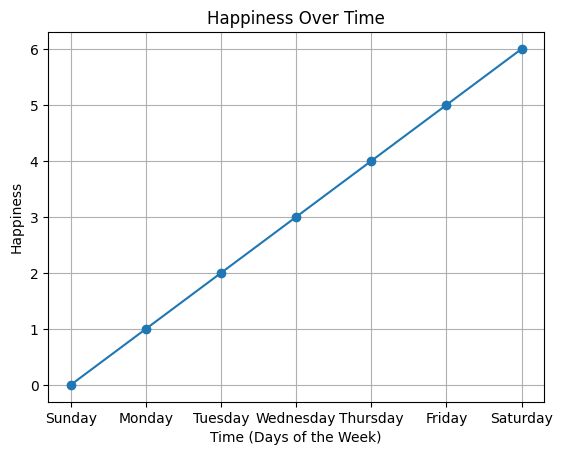

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.arange(7)  # 7 days of the week
y = x  # Gradient of x=y

# Define the days of the week as labels for the x-axis
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the plot
plt.plot(x, y, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Time (Days of the Week)')
plt.ylabel('Happiness')
plt.title('Happiness Over Time')

# Set the x-axis labels to be the days of the week
plt.xticks(x, days_of_week)

# Display the plot
plt.grid(True)
plt.show()


In [3]:

import pandas as pd

# CSV-Datei einlesen
data = pd.read_csv('C:\\Users\\jkani\\Github\\neuefische\\da-python-basics\\Top100_8_countries (1).csv')


# Spalte 'artist' aufteilen
max_artists = data['artist'].str.count(',').max() + 1
artists_split = data['artist'].str.split(',', expand=True, n=max_artists)
artists_split.columns = [f'artist{i+1}' for i in range(artists_split.shape[1])]

# Transformierte Daten mit ursprünglichen Daten zusammenführen
transformed_data = pd.concat([data.drop('artist', axis=1), artists_split], axis=1)

# Transformierte Daten speichern
transformed_data.to_csv('C:\\Users\\jkani\\Github\\neuefische\\da-python-basics\\Top100_8_countries_transformed.csv', index=False)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



file_path = 'C:\\Users\\jkani\\Github\\neuefische\\da-python-basics\\Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Berechnen Sie die Gesamtanzahl der Streams pro Artist und Land
# Angenommen, Ihre Daten sind bereits in einem geeigneten Format
# mit einer Spalte für das Land ('region') und Artists ('artist1', 'artist2', ..., 'artist19')
artist_streams = pd.DataFrame()
for i in range(1, 20):  # Anzahl der Artist-Spalten
    artist_col = f'artist{i}'
    artist_streams = artist_streams.append(
        data[['region', artist_col, 'streams']]
        .rename(columns={artist_col: 'artist'})
        .dropna()
    )

# Gruppieren Sie die Daten nach Land und Artist und summieren Sie die Streams
grouped = artist_streams.groupby(['region', 'artist']).sum().reset_index()

# Ermitteln Sie die Top 3 Artists pro Land basierend auf den Gesamtstreams
top_artists = grouped.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Plot erstellen
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='region', y='streams', hue='artist', data=top_artists, dodge=False)

# Fügen Sie Beschriftungen zu jedem Balken hinzu
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Beschriftungen und Titel einstellen
plt.xlabel('Country')
plt.ylabel('Total Streams')
plt.title('Top 3 Artists per Country')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stellen Sie sicher, dass die Balken eine angemessene Breite haben
for bar in ax.patches:
    bar.set_width(bar_width)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_5172\1802509955.py:10: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Initialisieren Sie einen leeren DataFrame für die Streams der Artists
artist_streams = pd.DataFrame()

# Angenommen, Sie haben bis zu 19 Artists pro Track
for i in range(1, 20):  # Anzahl der Artist-Spalten
    artist_col = f'artist{i}'
    # Fügen Sie die Streams pro Artist dem DataFrame hinzu
    artist_streams = artist_streams.concat(
        data[['region', artist_col, 'streams']]
        .rename(columns={artist_col: 'artist'})
        .dropna(subset=['artist'])
    )

# Entfernen Sie unnötige Nullwerte aus der 'streams' Spalte
artist_streams = artist_streams[artist_streams['streams'] > 0]

# Gruppieren Sie die Daten nach Land und Artist und summieren Sie die Streams
grouped = artist_streams.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Artists pro Land basierend auf den Gesamtstreams
top_artists = grouped.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Plot erstellen
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='region', y='streams', hue='artist', data=top_artists, dodge=False)

# Definieren Sie die Balkenbreite
bar_width = 0.7  # Sie können diesen Wert anpassen, um die Balkenbreite zu ändern

# Stellen Sie sicher, dass die Balken eine angemessene Breite haben
for bar in ax.patches:
    bar.set_width(bar_width)

# Fügen Sie Beschriftungen zu jedem Balken hinzu
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Beschriftungen und Titel einstellen
plt.xlabel('Country')
plt.ylabel('Total Streams')
plt.title('Top 3 Artists per Country')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Diagramm anzeigen
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\1181517274.py:9: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


AttributeError: 'DataFrame' object has no attribute 'concat'

C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\2024086122.py:9: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


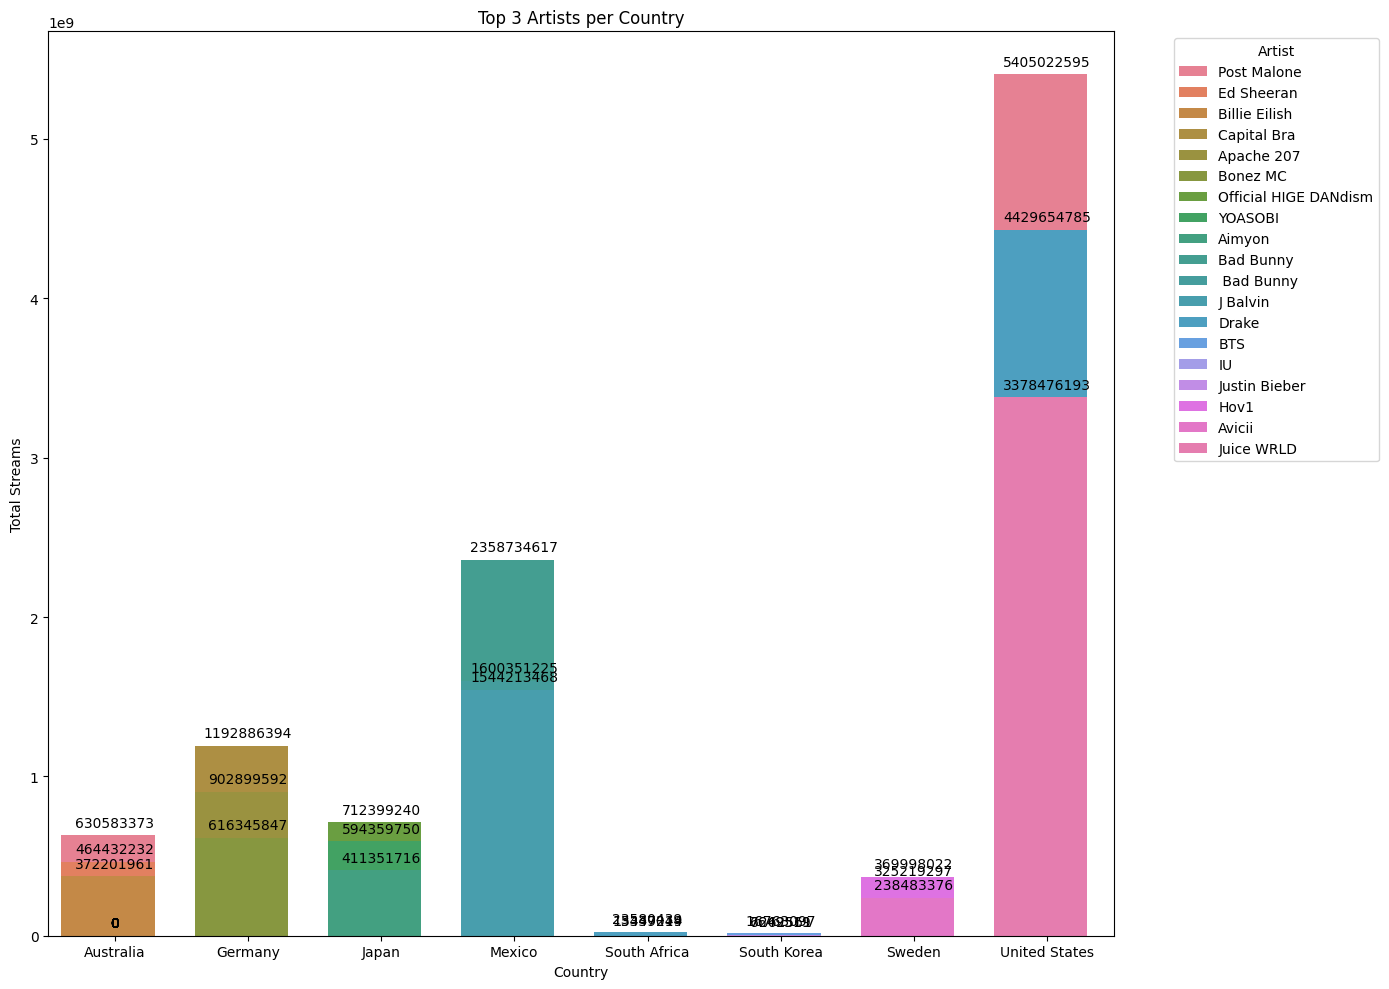

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Initialisieren Sie eine Liste, um die DataFrames zu sammeln
dataframes_list = []

# Erstellen Sie für jede Artist-Spalte einen DataFrame und fügen Sie ihn zur Liste hinzu
for i in range(1, 20):  # Anpassen an die tatsächliche Anzahl Ihrer Artist-Spalten
    artist_col = f'artist{i}'
    temp_df = data[['region', artist_col, 'streams']].rename(columns={artist_col: 'artist'})
    temp_df = temp_df[temp_df['artist'].notna()]  # Entfernen Sie Zeilen, in denen der Artist NaN ist
    dataframes_list.append(temp_df)

# Verwenden Sie pd.concat, um alle DataFrames in der Liste zusammenzuführen
artist_streams = pd.concat(dataframes_list, ignore_index=True)

# Gruppieren Sie die Daten nach Land und Artist und summieren Sie die Streams
grouped = artist_streams.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Artists pro Land basierend auf den Gesamtstreams
top_artists = grouped.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Plot erstellen
plt.figure(figsize=(14, 10))
bar_width = 0.7  # Sie können diesen Wert anpassen, um die Balkenbreite zu ändern
ax = sns.barplot(x='region', y='streams', hue='artist', data=top_artists, dodge=False)

# Fügen Sie Beschriftungen zu jedem Balken hinzu
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Stellen Sie sicher, dass die Balken eine angemessene Breite haben
for bar in ax.patches:
    bar.set_width(bar_width)

# Beschriftungen und Titel einstellen
plt.xlabel('Country')
plt.ylabel('Total Streams')
plt.title('Top 3 Artists per Country')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Diagramm anzeigen
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\3653400343.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


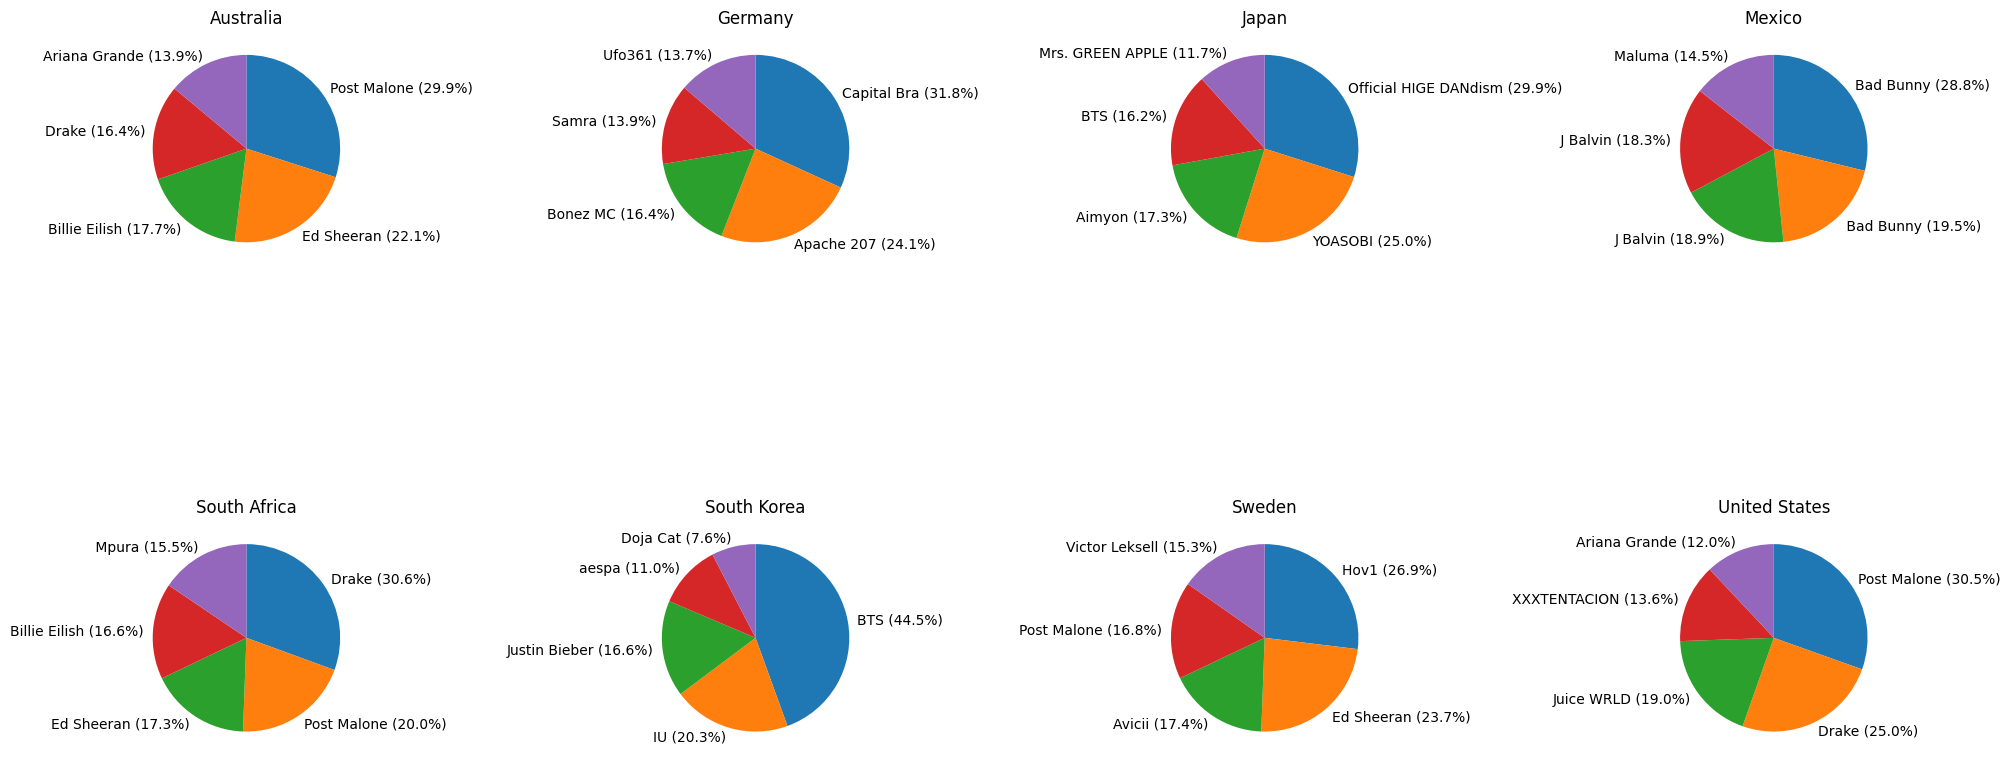

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Initialisieren Sie eine Liste, um die DataFrames zu sammeln
dataframes_list = []

# Erstellen Sie für jede Artist-Spalte einen DataFrame und fügen Sie ihn zur Liste hinzu
for i in range(1, 20):  # Anpassen an die tatsächliche Anzahl Ihrer Artist-Spalten
    artist_col = f'artist{i}'
    temp_df = data[['region', artist_col, 'streams']].rename(columns={artist_col: 'artist'})
    temp_df = temp_df[temp_df['artist'].notna()]  # Entfernen Sie Zeilen, in denen der Artist NaN ist
    dataframes_list.append(temp_df)

# Verwenden Sie pd.concat, um alle DataFrames in der Liste zusammenzuführen
artist_streams = pd.concat(dataframes_list, ignore_index=True)

# Gruppieren Sie die Daten nach Land und Artist und summieren Sie die Streams
grouped = artist_streams.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Artists pro Land basierend auf den Gesamtstreams
top_artists = grouped.groupby('region').apply(lambda x: x.nlargest(5, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten die Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\1622935696.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


KeyError: 'artist'

C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\2033515346.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


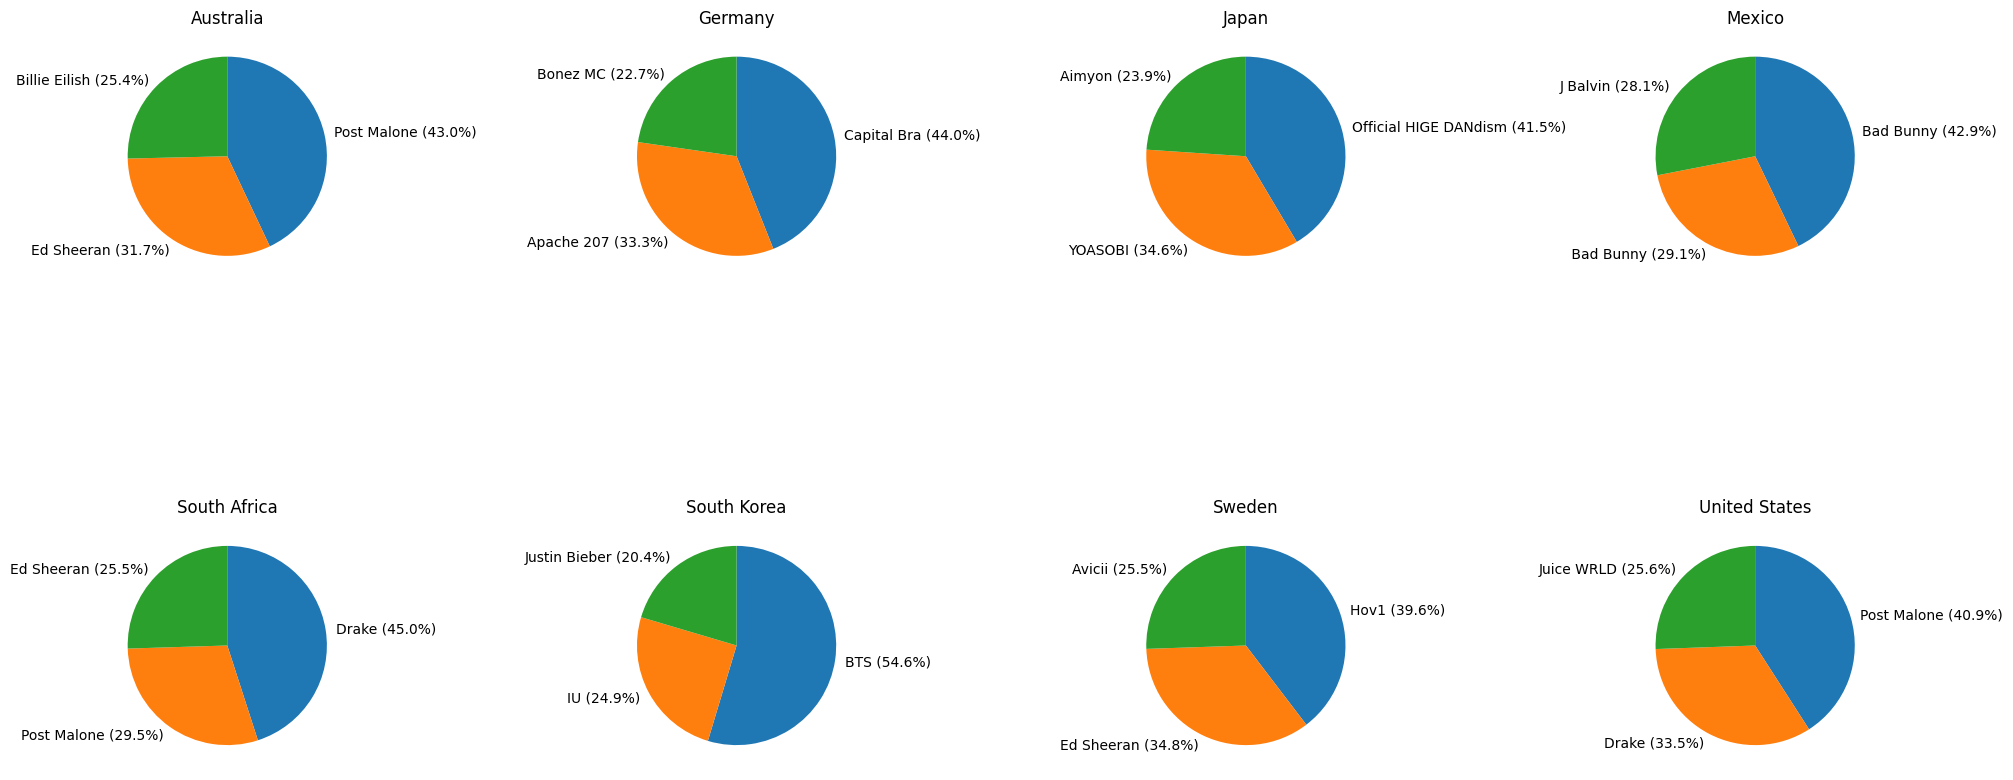

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Pivotieren Sie die Artist-Spalten in eine einzelne Spalte 'artist'
artist_columns = [f'artist{i}' for i in range(1, 20)]
melted_data = data.melt(id_vars=['region', 'streams'], value_vars=artist_columns, 
                        var_name='artist_number', value_name='artist').dropna(subset=['artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = melted_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\1388230721.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


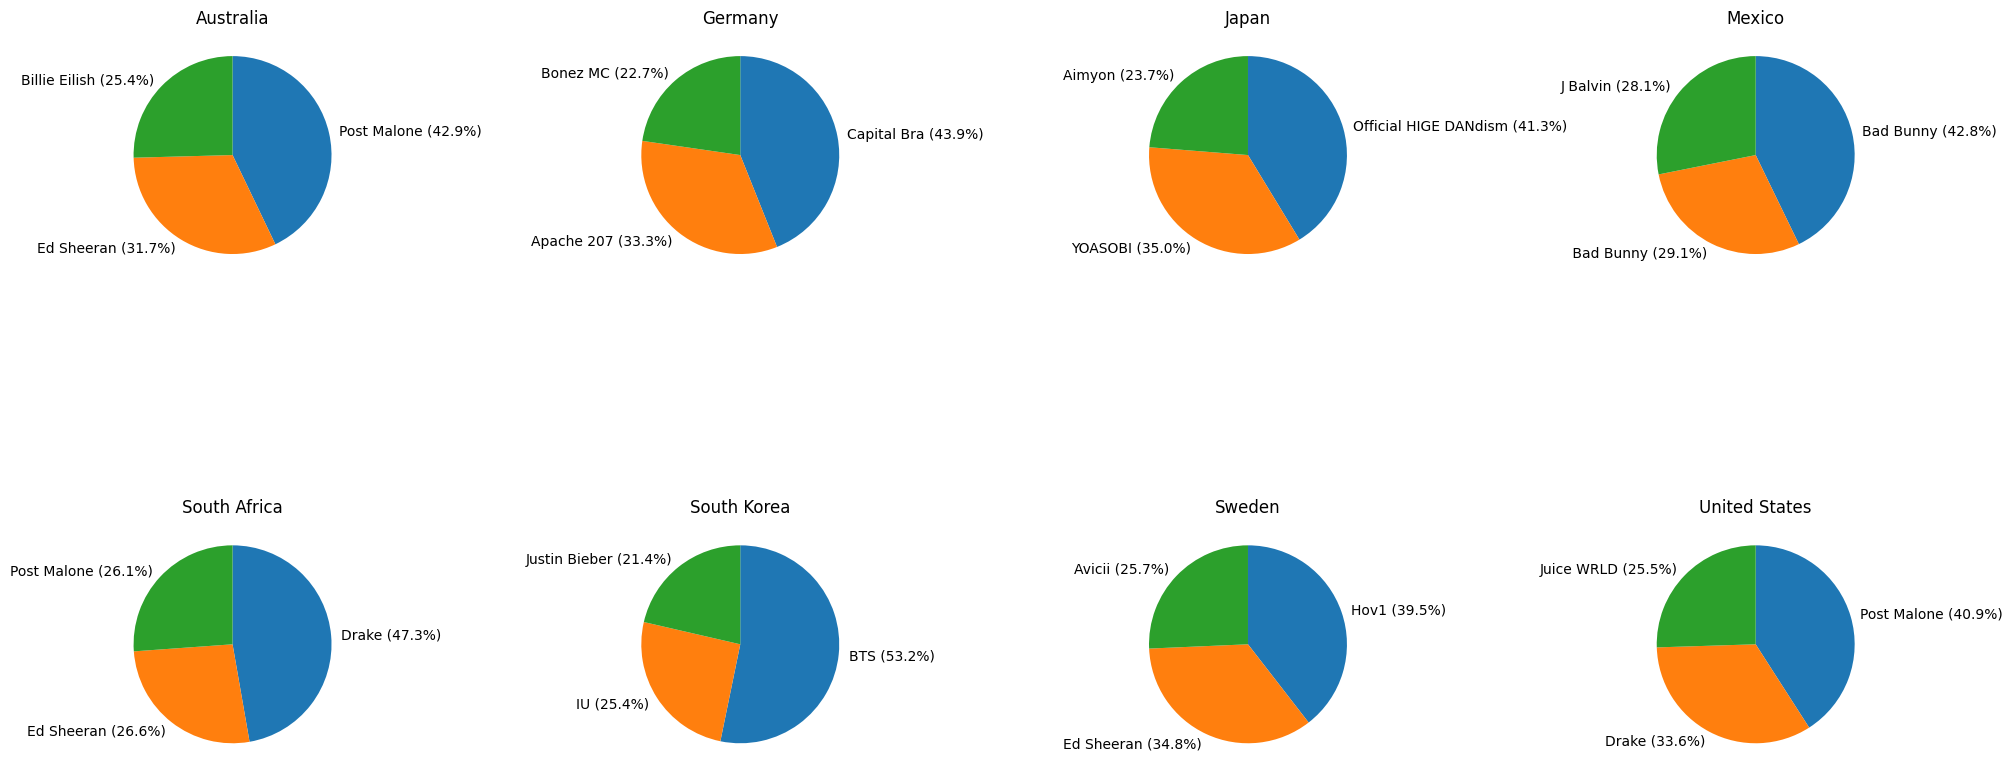

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Pivotieren Sie die Artist-Spalten in eine einzelne Spalte 'artist'
artist_columns = [f'artist{i}' for i in range(1, 20)]
melted_data = data.melt(id_vars=['region', 'streams'], value_vars=artist_columns, 
                        var_name='artist_number', value_name='artist').dropna(subset=['artist'])

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
melted_data = melted_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = melted_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\3726928831.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


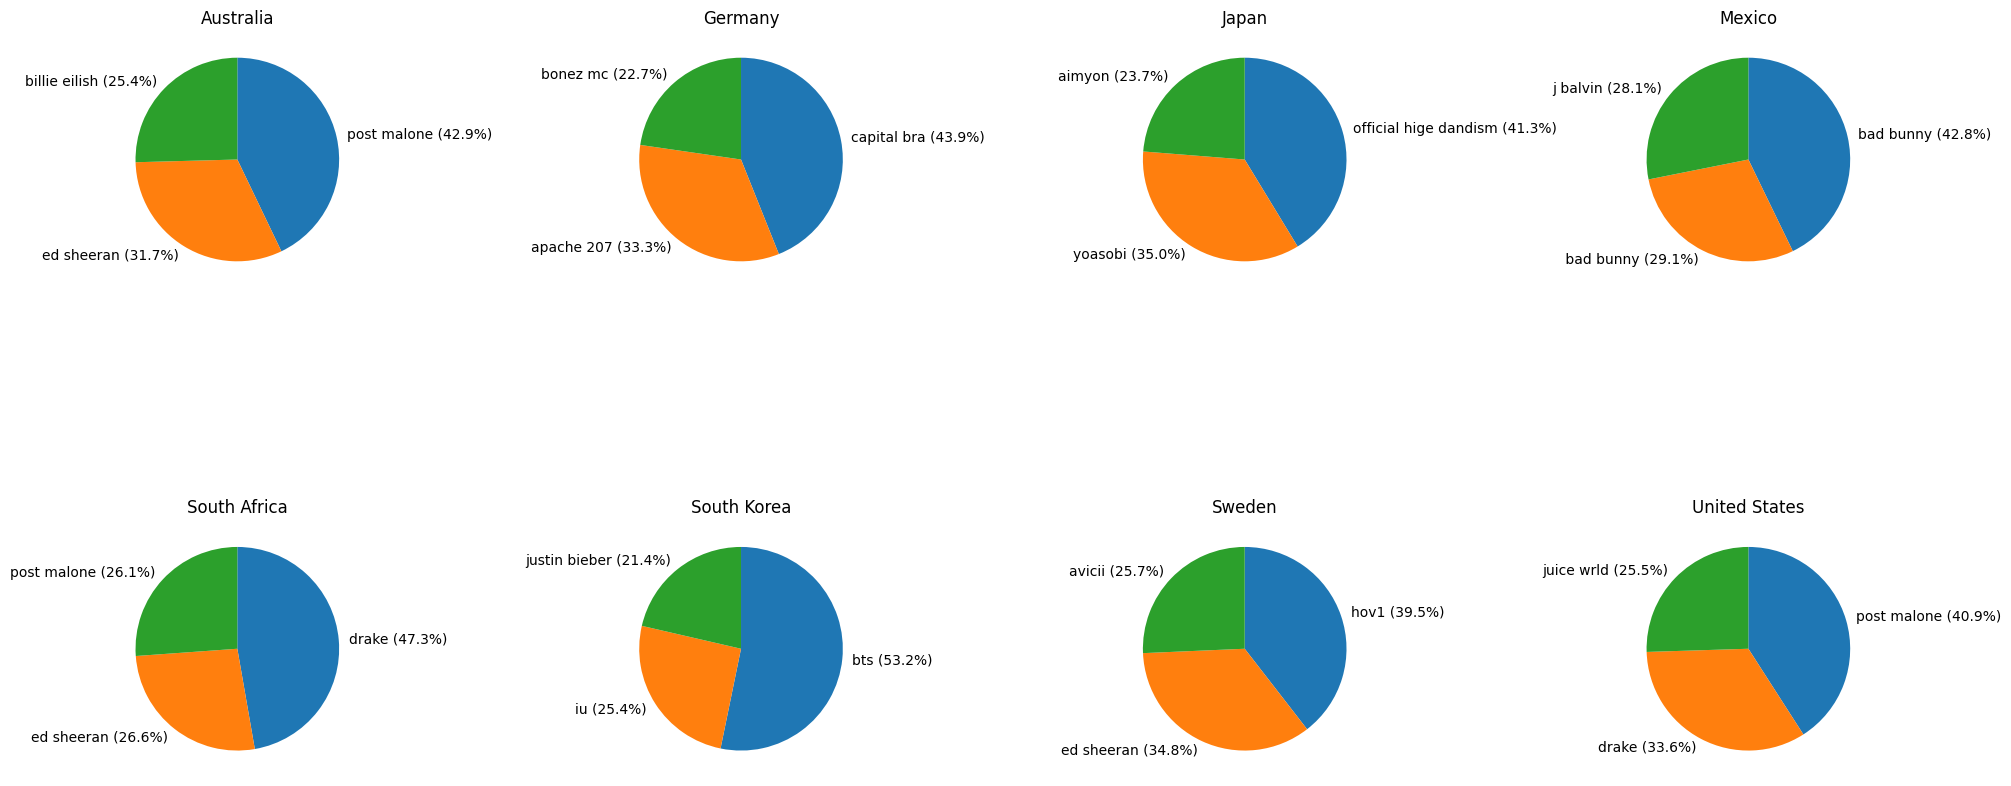

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Pivotieren Sie die Artist-Spalten in eine einzelne Spalte 'artist'
artist_columns = [f'artist{i}' for i in range(1, 20)]
melted_data = data.melt(id_vars=['region', 'streams'], value_vars=artist_columns, 
                        var_name='artist_number', value_name='artist').dropna(subset=['artist'])

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
melted_data['artist'] = melted_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
melted_data = melted_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = melted_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\2166764412.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\2166764412.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)


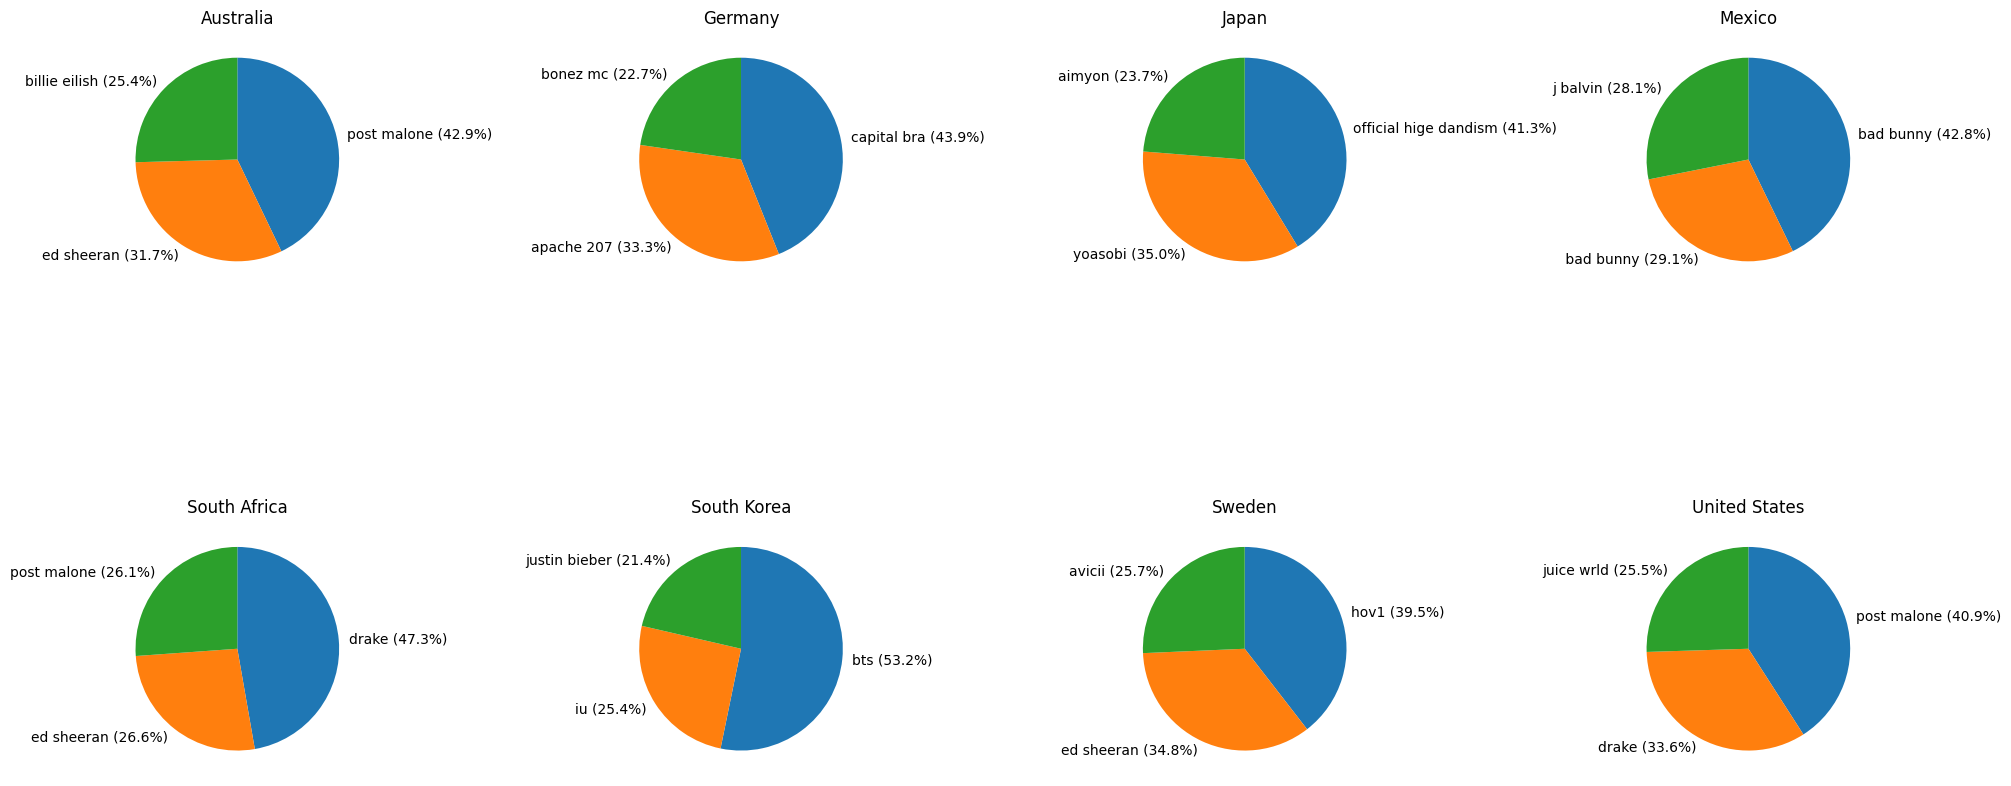

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Erstellen Sie eine leere DataFrame für die aggregierten Daten
aggregated_data = pd.DataFrame(columns=['region', 'artist', 'streams'])

# Durchlaufen Sie die Artist-Spalten und fügen Sie die Daten in die aggregierte DataFrame ein
for col in data.columns:
    if col.startswith('artist'):
        artist_data = data[['region', col, 'streams']].rename(columns={col: 'artist'})
        artist_data = artist_data.dropna(subset=['artist'])
        aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
aggregated_data['artist'] = aggregated_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
aggregated_data = aggregated_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = aggregated_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\312263153.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\312263153.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)


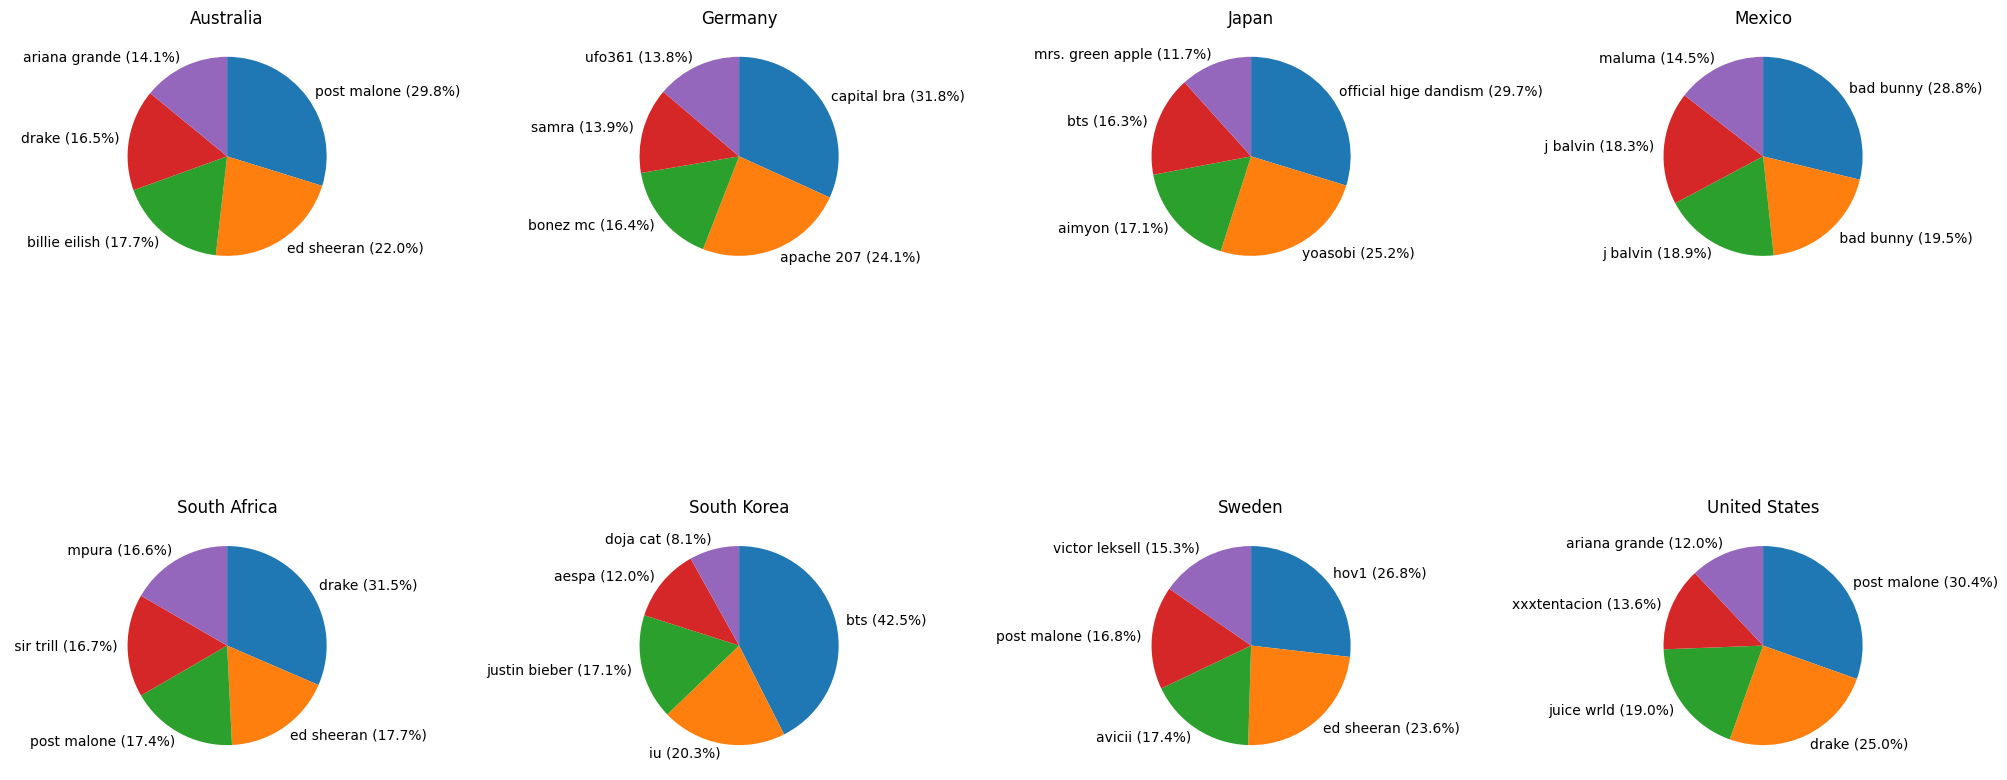

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Erstellen Sie eine leere DataFrame für die aggregierten Daten
aggregated_data = pd.DataFrame(columns=['region', 'artist', 'streams'])

# Durchlaufen Sie die Artist-Spalten und fügen Sie die Daten in die aggregierte DataFrame ein
for col in data.columns:
    if col.startswith('artist'):
        artist_data = data[['region', col, 'streams']].rename(columns={col: 'artist'})
        artist_data = artist_data.dropna(subset=['artist'])
        aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
aggregated_data['artist'] = aggregated_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
aggregated_data = aggregated_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = aggregated_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(5, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\108976042.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\108976042.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)


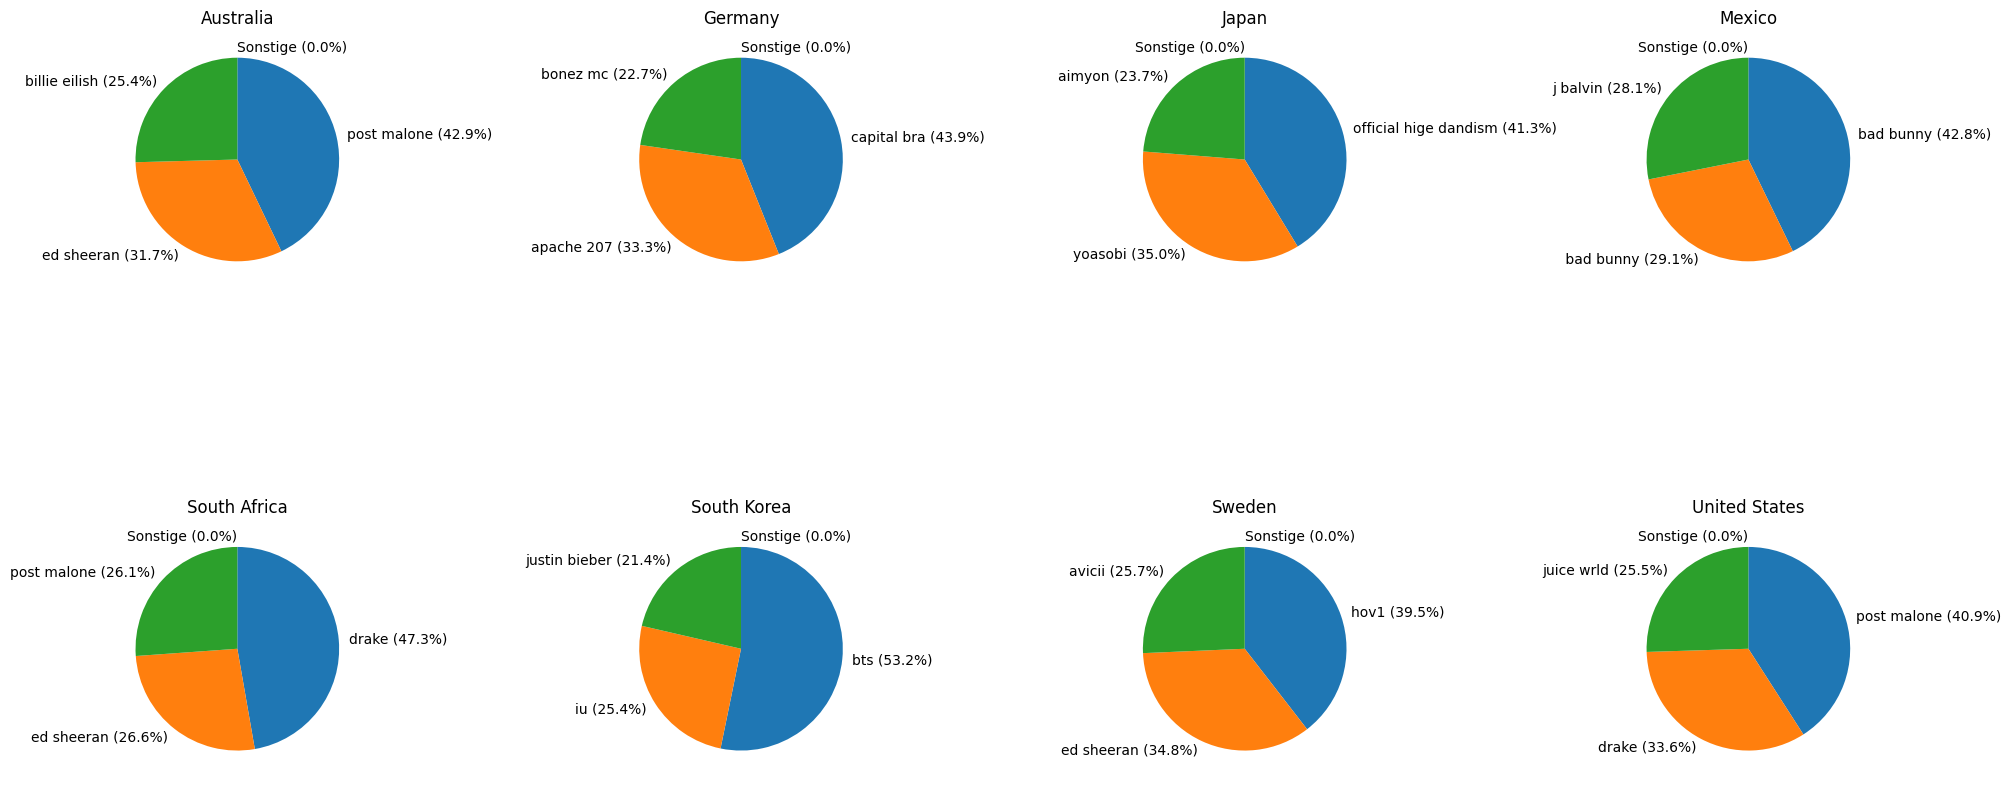

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Erstellen Sie eine leere DataFrame für die aggregierten Daten
aggregated_data = pd.DataFrame(columns=['region', 'artist', 'streams'])

# Durchlaufen Sie die Artist-Spalten und fügen Sie die Daten in die aggregierte DataFrame ein
for col in data.columns:
    if col.startswith('artist'):
        artist_data = data[['region', col, 'streams']].rename(columns={col: 'artist'})
        artist_data = artist_data.dropna(subset=['artist'])
        aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
aggregated_data['artist'] = aggregated_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
aggregated_data = aggregated_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = aggregated_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    
    # Filtern Sie die Künstler, die nicht zu den Top 3 gehören und fassen Sie sie als "Sonstige" zusammen
    top3_artists = country_data.nlargest(3, 'streams')
    other_artists = country_data[~country_data.index.isin(top3_artists.index)]
    other_streams = other_artists['streams'].sum()
    
    sizes = top3_artists['streams'].tolist() + [other_streams]  # Hinzufügen von "Sonstige"
    labels = top3_artists.apply(lambda row: f"{row['artist']} ({(row['streams']/total_streams*100):.1f}%)", axis=1).tolist() + [f"Sonstige ({(other_streams/total_streams*100):.1f}%)"]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\2889162428.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\2889162428.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)


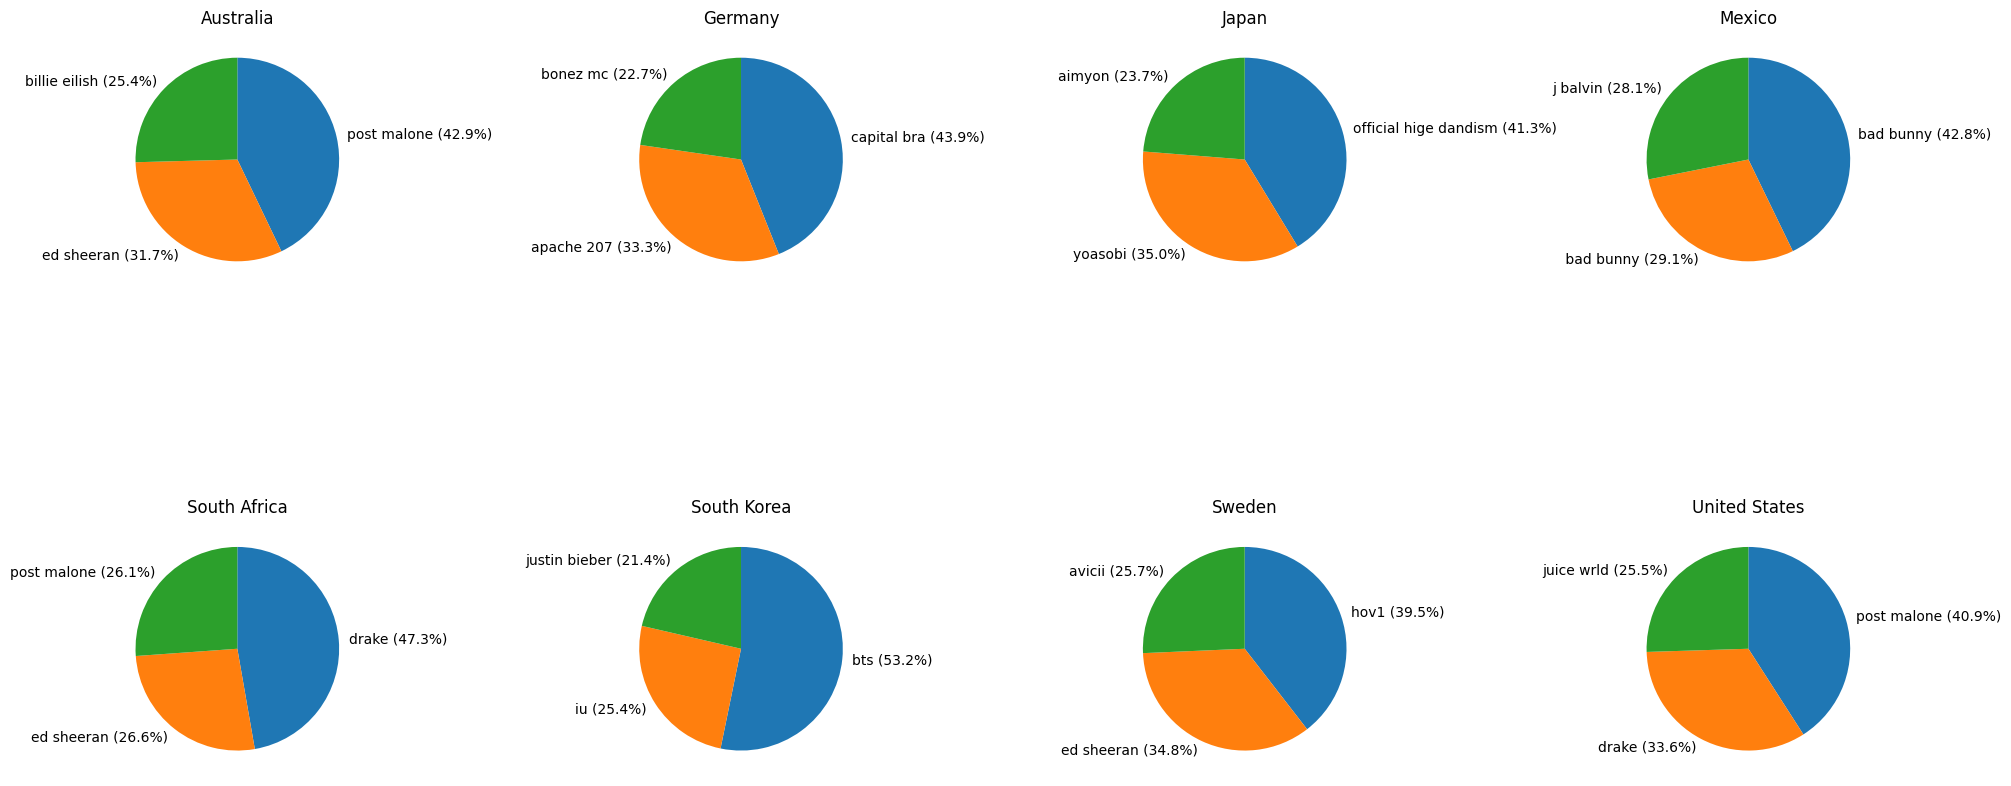

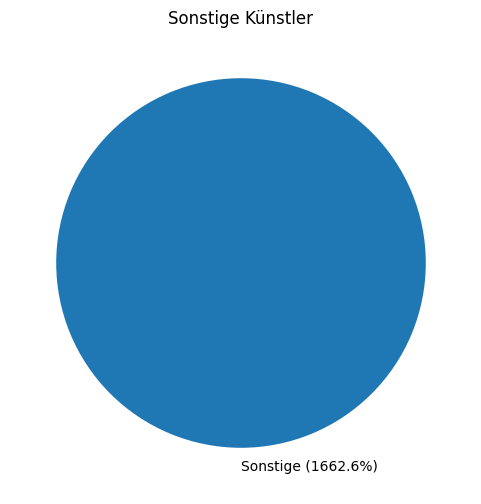

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Erstellen Sie eine leere DataFrame für die aggregierten Daten
aggregated_data = pd.DataFrame(columns=['region', 'artist', 'streams'])

# Durchlaufen Sie die Artist-Spalten und fügen Sie die Daten in die aggregierte DataFrame ein
for col in data.columns:
    if col.startswith('artist'):
        artist_data = data[['region', col, 'streams']].rename(columns={col: 'artist'})
        artist_data = artist_data.dropna(subset=['artist'])
        aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
aggregated_data['artist'] = aggregated_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
aggregated_data = aggregated_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = aggregated_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    sizes = country_data['streams'] / total_streams * 100  # Berechnen Sie den Prozentsatz der Streams
    labels = [f"{artist} ({size:.1f}%)" for artist, size in zip(country_data['artist'], sizes)]
    ax.pie(sizes, labels=labels, startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()

# Erstellen Sie ein separates Diagramm für "Sonstige" als Aggregation aller Künstler, die nicht aufgeführt sind
other_data = aggregated_data[~aggregated_data['artist'].isin(top_artists['artist'])]
total_other_streams = other_data['streams'].sum()
sizes_other = total_other_streams / total_streams * 100
labels_other = [f"Sonstige ({sizes_other:.1f}%)"]
plt.figure(figsize=(6, 6))
plt.pie([sizes_other], labels=labels_other, startangle=90, counterclock=False)
plt.title('Sonstige Künstler')
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\263051765.py:8: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\263051765.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)


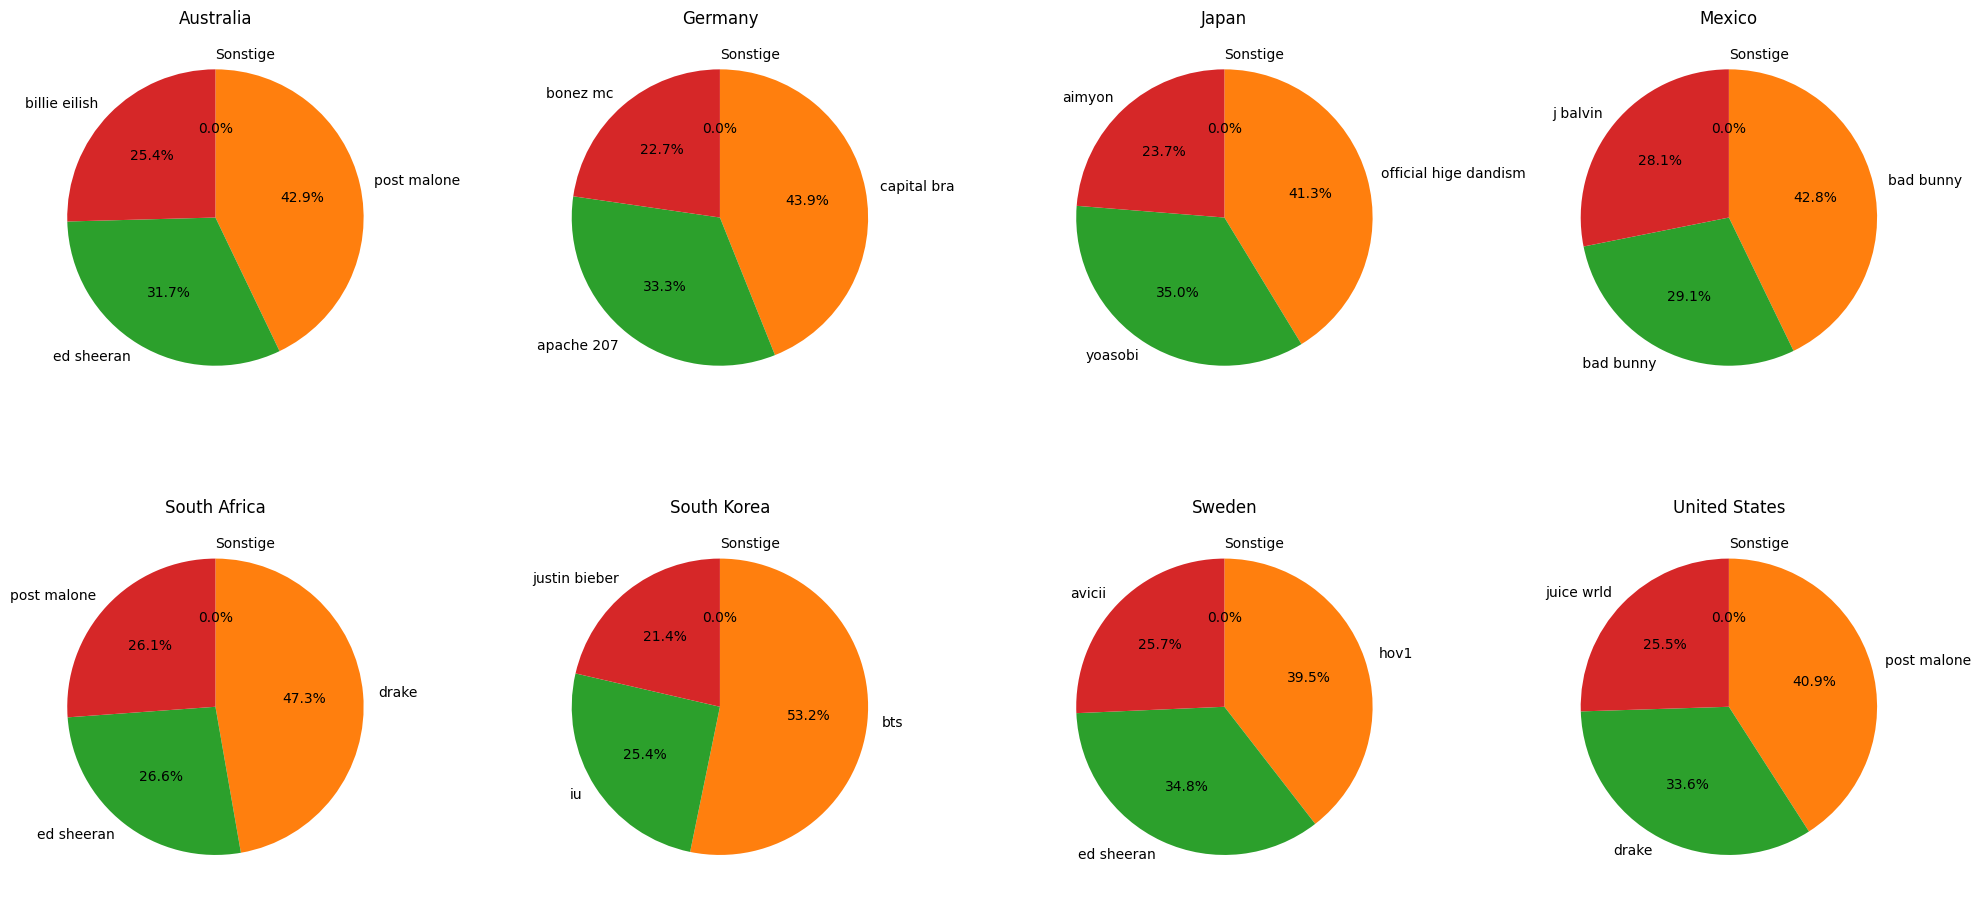

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Erstellen Sie eine leere DataFrame für die aggregierten Daten
aggregated_data = pd.DataFrame(columns=['region', 'artist', 'streams'])

# Durchlaufen Sie die Artist-Spalten und fügen Sie die Daten in die aggregierte DataFrame ein
for col in data.columns:
    if col.startswith('artist'):
        artist_data = data[['region', col, 'streams']].rename(columns={col: 'artist'})
        artist_data = artist_data.dropna(subset=['artist'])
        aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
aggregated_data['artist'] = aggregated_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
aggregated_data = aggregated_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = aggregated_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    
    # Berechnen Sie die verbleibenden Streams als Summe aller Streams abzüglich der Streams der Top-Künstler
    remaining_streams = total_streams - country_data['streams'].sum()
    
    sizes = [remaining_streams] + list(country_data['streams'])
    labels = ['Sonstige'] + [f"{artist}" for artist in country_data['artist']]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\3180882982.py:7: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\3180882982.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)


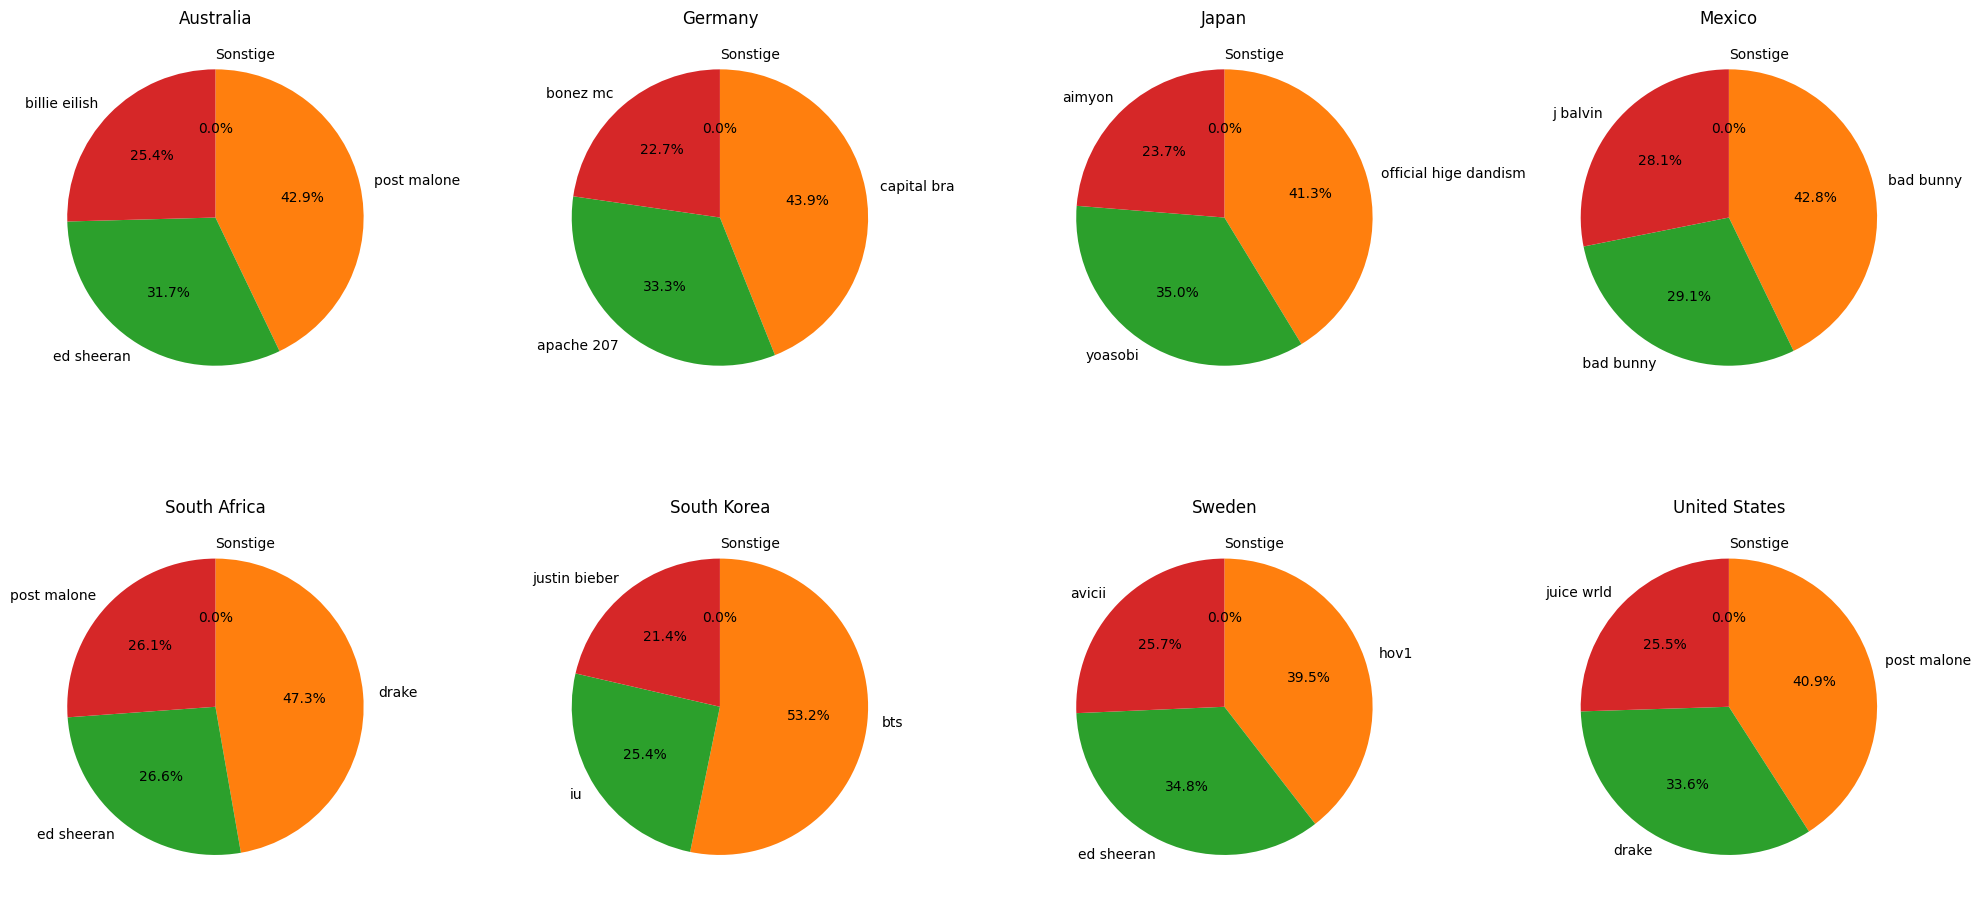

In [ ]:
import pandas as pd

# Setzen Sie den Pfad zu Ihrer CSV-Datei
file_path = 'C:/Users/jkani/Github/neuefische/da-python-basics/Top100_8_countries_transformed.csv'

# Lesen Sie die CSV-Datei
data = pd.read_csv(file_path)

# Erstellen Sie eine leere DataFrame für die aggregierten Daten
aggregated_data = pd.DataFrame(columns=['region', 'artist', 'streams'])

# Durchlaufen Sie die Artist-Spalten und fügen Sie die Daten in die aggregierte DataFrame ein
for col in data.columns:
    if col.startswith('artist'):
        artist_data = data[['region', col, 'streams']].rename(columns={col: 'artist'})
        artist_data = artist_data.dropna(subset=['artist'])
        aggregated_data = pd.concat([aggregated_data, artist_data], ignore_index=True)

# Normalisieren Sie die Künstlernamen, um Unterschiede in der Schreibweise zu behandeln
aggregated_data['artist'] = aggregated_data['artist'].str.lower()

# Entfernen Sie Duplikate von Künstlern innerhalb desselben Tracks
aggregated_data = aggregated_data.drop_duplicates(subset=['region', 'streams', 'artist'])

# Führen Sie eine Aggregation durch, um die Gesamtanzahl der Streams pro Künstler und Land zu erhalten
grouped_data = aggregated_data.groupby(['region', 'artist'])['streams'].sum().reset_index()

# Ermitteln Sie die Top 3 Künstler pro Land basierend auf den aggregierten Streams
top_artists = grouped_data.groupby('region').apply(lambda x: x.nlargest(3, 'streams')).reset_index(drop=True)

# Erstellen Sie 8 Kreisdiagramme, einen für jedes Land
countries = top_artists['region'].unique()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Anpassen für die Anzahl der Länder
axs = axs.flatten()  # Flatten das Achsen-Array, wenn mehr als eine Zeile von Subplots

for i, country in enumerate(countries):
    ax = axs[i]
    country_data = top_artists[top_artists['region'] == country]
    total_streams = country_data['streams'].sum()
    
    # Berechnen Sie die verbleibenden Streams als Summe aller Streams abzüglich der Streams der Top-Künstler
    remaining_streams = total_streams - country_data['streams'].sum()
    
    sizes = [remaining_streams] + list(country_data['streams'])
    labels = ['Sonstige'] + [f"{artist}" for artist in country_data['artist']]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title(country)

# Anzeigen der Plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Einlesen der Daten mit low_memory=False
df = pd.read_csv('Top100_8_countries (1).csv', low_memory=False)

# Oder spezifizieren Sie Datentypen manuell
# Beispiel: Angenommen, Sie wissen, dass Spalte 14 ein String sein sollte und Spalte 15 ein float
dtypes = {14: str, 15: float}
df = pd.read_csv('Top100_8_countries (1).csv', dtype=dtypes)


In [ ]:
import pandas as pd

# Angenommen, df ist Ihr DataFrame
# Teilen Sie die Künstler-Strings und erstellen Sie eine Liste aller Künstler

df = pd.read_csv('Top100_8_countries (1).csv', low_memory=False)
all_artists = set()
df['artist'].str.split(', ').apply(all_artists.update)

# Für jeden Künstler eine Spalte erstellen und Dummy-Werte zuweisen
for artist in all_artists:
    df[artist] = df['artist'].str.contains(artist).astype(int)

# Jetzt hat df eine separate Spalte für jeden Künstler mit Dummy-Werten


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\1159568066.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[artist] = df['artist'].str.contains(artist).astype(int)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\1159568066.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[artist] = df['artist'].str.contains(artist).astype(int)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\1159568066.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

error: nothing to repeat at position 0

In [ ]:
df.shape

(1234155, 2710)

In [ ]:
import pandas as pd

# Angenommen, df ist Ihr ursprünglicher DataFrame
# Erstellen einer Liste aller Künstler
df = pd.read_csv('Top100_8_countries (1).csv', low_memory=False)
all_artists = set()
df['artist'].str.split(', ').apply(all_artists.update)

# Erstellen eines separaten DataFrames für die Künstlerspalten
artist_df = pd.DataFrame()
for artist in all_artists:
    artist_df[artist] = df['artist'].str.contains(artist).astype(int)

# Zusammenführen des neuen DataFrames mit dem ursprünglichen DataFrame
df = pd.concat([df, artist_df], axis=1)

# Der DataFrame df enthält jetzt die ursprünglichen Daten sowie die neuen Künstlerspalten


C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\4082247257.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  artist_df[artist] = df['artist'].str.contains(artist).astype(int)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\4082247257.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  artist_df[artist] = df['artist'].str.contains(artist).astype(int)
C:\Users\jkani\AppData\Local\Temp\ipykernel_29848\4082247257.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Top100_8_countries (1).csv', low_memory=False)
# Angenommen, df ist Ihr DataFrame
artist_columns = [col for col in df.columns if col not in ['title', 'rank', 'date', 'track_id', 'region', 'trend', 'streams']]

# Berechnen der Gesamtstreams pro Künstler und Land
artist_streams = {artist: df[df[artist] == 1].groupby('region')['streams'].sum() for artist in artist_columns}

# Erstellen eines neuen DataFrames mit den Top 5 Künstlern pro Land
top_artists_per_region = pd.DataFrame()
for region in df['region'].unique():
    region_streams = {artist: artist_streams[artist].get(region, 0) for artist in artist_columns}
    top_artists = sorted(region_streams.items(), key=lambda x: x[1], reverse=True)[:5]
    for artist, streams in top_artists:
        top_artists_per_region = top_artists_per_region.append({'region': region, 'artist': artist, 'streams': streams}, ignore_index=True)

# Visualisierung
for region in df['region'].unique():
    region_df = top_artists_per_region[top_artists_per_region['region'] == region]
    plt.figure(figsize=(10, 6))
    plt.bar(region_df['artist'], region_df['streams'])
    plt.title(f'Top 5 Artists in {region} by Streams')
    plt.xlabel('Artist')
    plt.ylabel('Streams')
    plt.xticks(rotation=45)
    plt.show()


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import pandas as pd
df = pd.read_csv('Top100_8_countries (1).csv', low_memory=False)

In [ ]:
import pandas as pd

# Angenommen, df ist Ihr Haupt-DataFrame

# Erstellen einer Liste aller einzigartigen Künstler
unique_artists = set()
df['artist'].str.split(', ').apply(unique_artists.update)

# Speichern der Künstlerliste als separate CSV-Datei
artist_df = pd.DataFrame({'artist': list(unique_artists)})
artist_df.to_csv('artists.csv', index=False)

# Weiterführen der Analyse im Haupt-DataFrame und Zusammenführen mit der Künstler-CSV bei Bedarf
# ...


In [ ]:
import pandas as pd

# Angenommen, df ist Ihr Haupt-DataFrame

# Schritt 1: Erstellen einer separaten Künstlerliste
unique_artists = set()
df['artist'].str.split(', ').apply(unique_artists.update)
artist_df = pd.DataFrame({'artist': list(unique_artists)})
artist_df.to_csv('artists.csv', index=False)

# Schritt 2: Aufteilen der 'artist'-Spalte im Haupt-DataFrame
split_rows = [
    {**row, 'artist': artist}
    for _, row in df.iterrows()
    for artist in row['artist'].split(', ')
]
split_df = pd.DataFrame(split_rows)

# Schritt 3: Merge mit der separaten Künstlerliste
merged_df = pd.merge(split_df, artist_df, on='artist', how='inner')


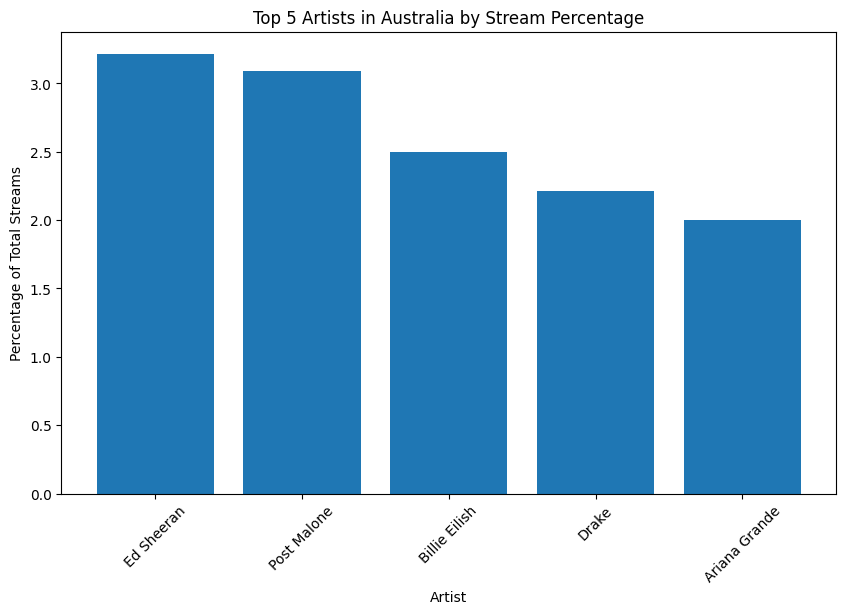

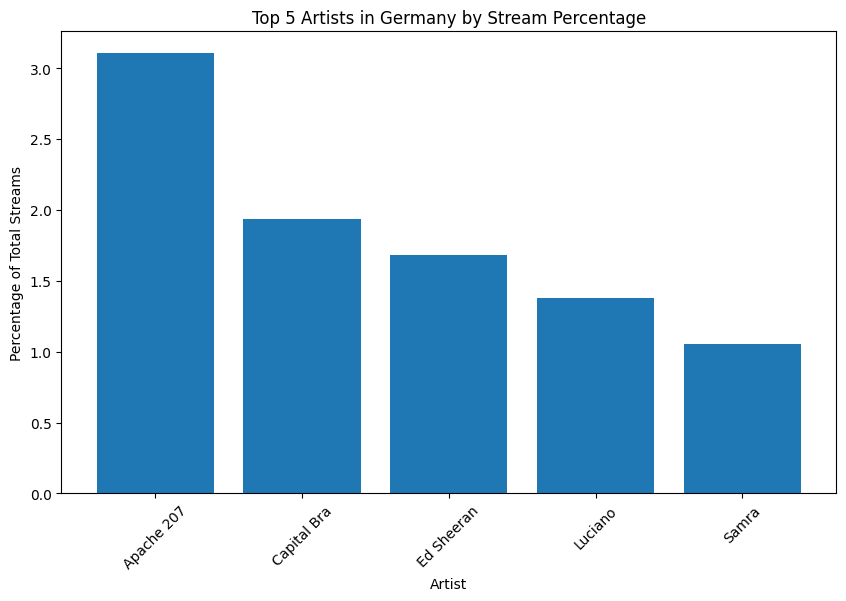

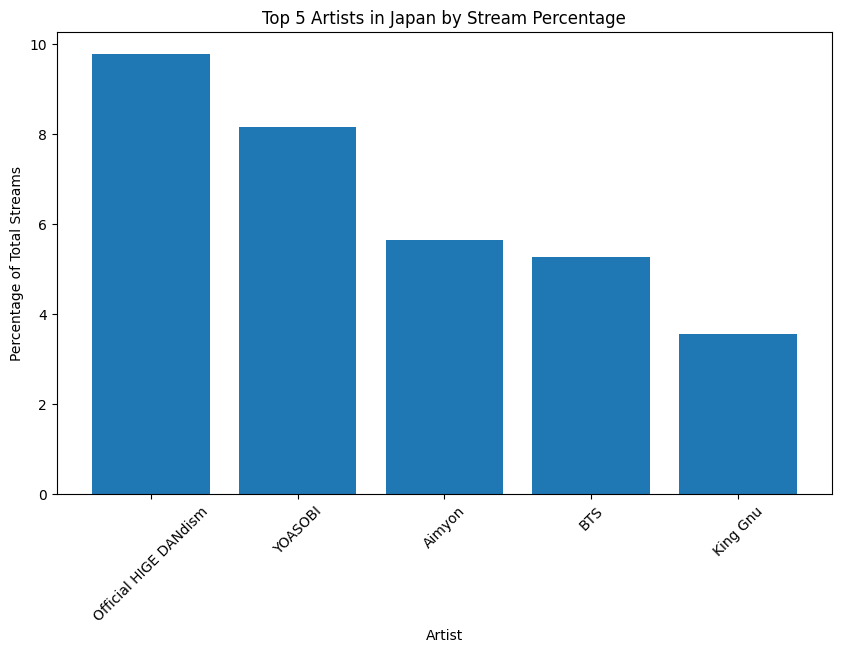

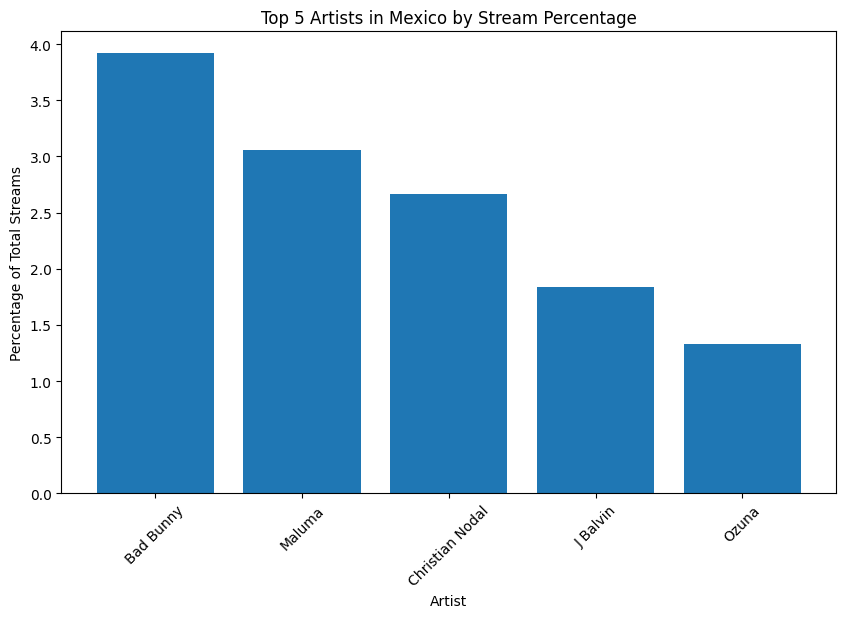

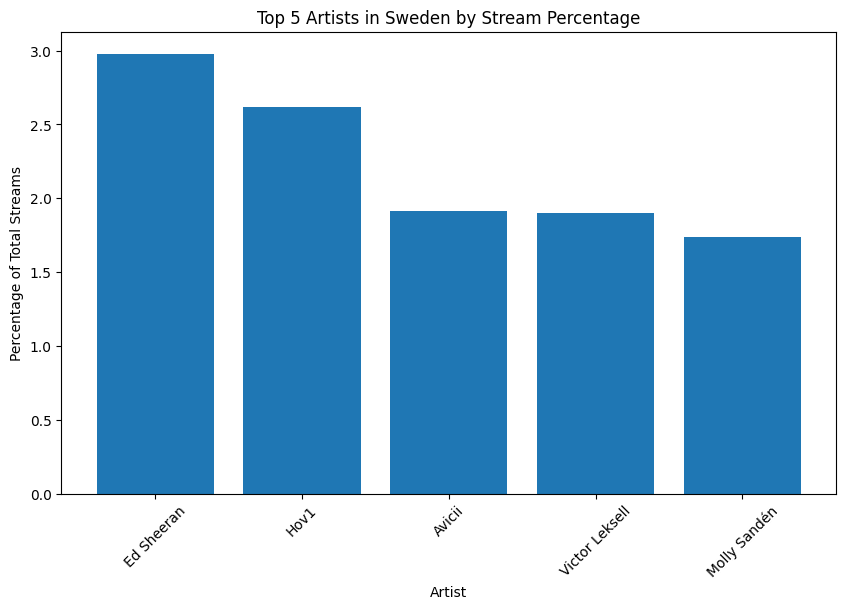

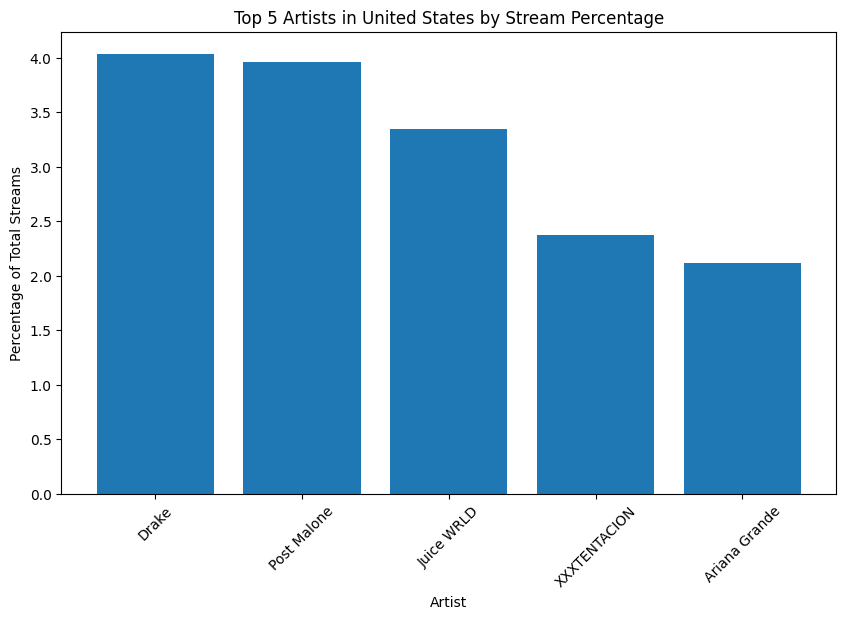

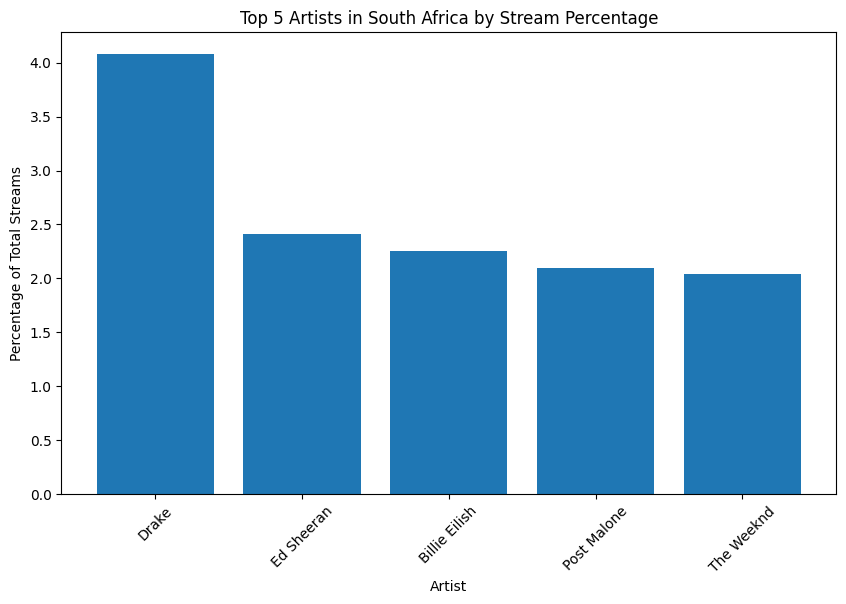

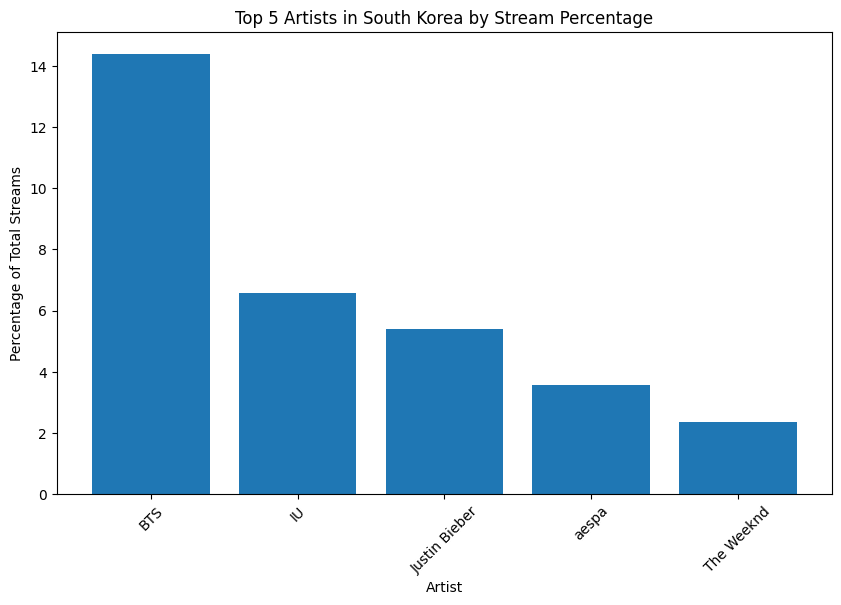

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame

# Schritt 1: Berechnen der Gesamtstreams pro Künstler und Land
artist_streams = df.groupby(['artist', 'region'])['streams'].sum().reset_index()

# Schritt 2: Berechnen der Gesamtstreams pro Land
total_streams_per_region = df.groupby('region')['streams'].sum()

# Schritt 3: Berechnen der prozentualen Anteile
artist_streams['percentage'] = artist_streams.apply(
    lambda x: (x['streams'] / total_streams_per_region[x['region']]) * 100, axis=1
)

# Ermitteln der Top 5 Künstler pro Land
top_artists_per_region = artist_streams.groupby('region').apply(
    lambda x: x.nlargest(5, 'percentage')
).reset_index(drop=True)

# Schritt 4: Plotten der Daten
for region in df['region'].unique():
    region_df = top_artists_per_region[top_artists_per_region['region'] == region]
    plt.figure(figsize=(10, 6))
    plt.bar(region_df['artist'], region_df['percentage'])
    plt.title(f'Top 5 Artists in {region} by Stream Percentage')
    plt.xlabel('Artist')
    plt.ylabel('Percentage of Total Streams')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import pandas as pd

# Angenommen, df ist Ihr Haupt-DataFrame

# Schritt 1: Erstellen einer separaten Künstlerliste
unique_artists = set()
df['artist'].str.split(', ').apply(unique_artists.update)
artist_df = pd.DataFrame({'artist': list(unique_artists)})
artist_df.to_csv('artists.csv', index=False)

# Schritt 2: Aufteilen der 'artist'-Spalte im Haupt-DataFrame
split_rows = []  # Liste zum Sammeln der DataFrames

for index, row in df.iterrows():
    artists = row['artist'].split(', ')
    for artist in artists:
        split_row = row.copy()
        split_row['artist'] = artist
        split_rows.append(split_row)

split_df = pd.concat(split_rows, axis=1).reset_index(drop=True)

# Schritt 3: Merge mit der separaten Künstlerliste
merged_df = pd.merge(split_df, artist_df, on='artist', how='inner')


KeyError: 'artist'

In [ ]:
import pandas as pd

# Angenommen, df ist Ihr DataFrame
df = pd.read_csv('Top100_8_countries (1).csv', low_memory=False)


# Angenommen, df ist Ihr DataFrame
artist_rows = []

# Durchlaufen jeder Zeile im DataFrame
for index, row in df.iterrows():
    artists = row['artist'].split(', ')
    region = row['region']
    streams = row['streams']
    for artist in artists:
        artist_rows.append(pd.DataFrame({'artist': [artist], 'region': [region], 'streams': [streams]}))

# Zusammenführen aller DataFrames
artist_df = pd.concat(artist_rows, ignore_index=True)

# Gruppieren nach Künstler und Region und Summieren der Streams
grouped_df = artist_df.groupby(['artist', 'region']).sum().reset_index()

# Ermitteln der Top 5 Künstler pro Land
top_artists_per_region = grouped_df.groupby('region').apply(lambda x: x.nlargest(5, 'streams')).reset_index(drop=True)

# Anzeigen der Ergebnisse
print(top_artists_per_region)



                   artist         region       streams
0             Post Malone      Australia  6.626164e+08
1              Ed Sheeran      Australia  4.691684e+08
2           Billie Eilish      Australia  3.722020e+08
3                   Drake      Australia  3.542495e+08
4                  Khalid      Australia  3.469494e+08
5             Capital Bra        Germany  1.541218e+09
6                Bonez MC        Germany  1.117868e+09
7              Apache 207        Germany  1.037237e+09
8              RAF Camora        Germany  9.573127e+08
9                   Samra        Germany  9.002694e+08
10  Official HIGE DANdism          Japan  7.123992e+08
11                YOASOBI          Japan  5.943598e+08
12                 Aimyon          Japan  4.247872e+08
13                    BTS          Japan  3.945562e+08
14       Mrs. GREEN APPLE          Japan  2.786665e+08
15              Bad Bunny         Mexico  3.959086e+09
16               J Balvin         Mexico  3.043560e+09
17        

In [ ]:
import pandas as pd

# Angenommen, df ist Ihr Haupt-DataFrame

# Schritt 1: Erstellen einer separaten Künstlerliste
unique_artists = set()
df['artist'].str.split(', ').apply(unique_artists.update)
artist_df = pd.DataFrame({'artist': list(unique_artists)})
artist_df.to_csv('artists.csv', index=False)

# Schritt 2: Aufteilen der 'artist'-Spalte im Haupt-DataFrame
artist_rows = []
for index, row in df.iterrows():
    artists = row['artist'].split(', ')
    for artist in artists:
        artist_row = row.copy()
        artist_row['artist'] = artist
        artist_rows.append(artist_row)

# Verwenden von pd.concat statt append für Effizienz
split_df = pd.concat(artist_rows, axis=1).reset_index(drop=True)

# Schritt 3: Merge mit der separaten Künstlerliste
merged_df = pd.merge(split_df, artist_df, on='artist', how='inner')


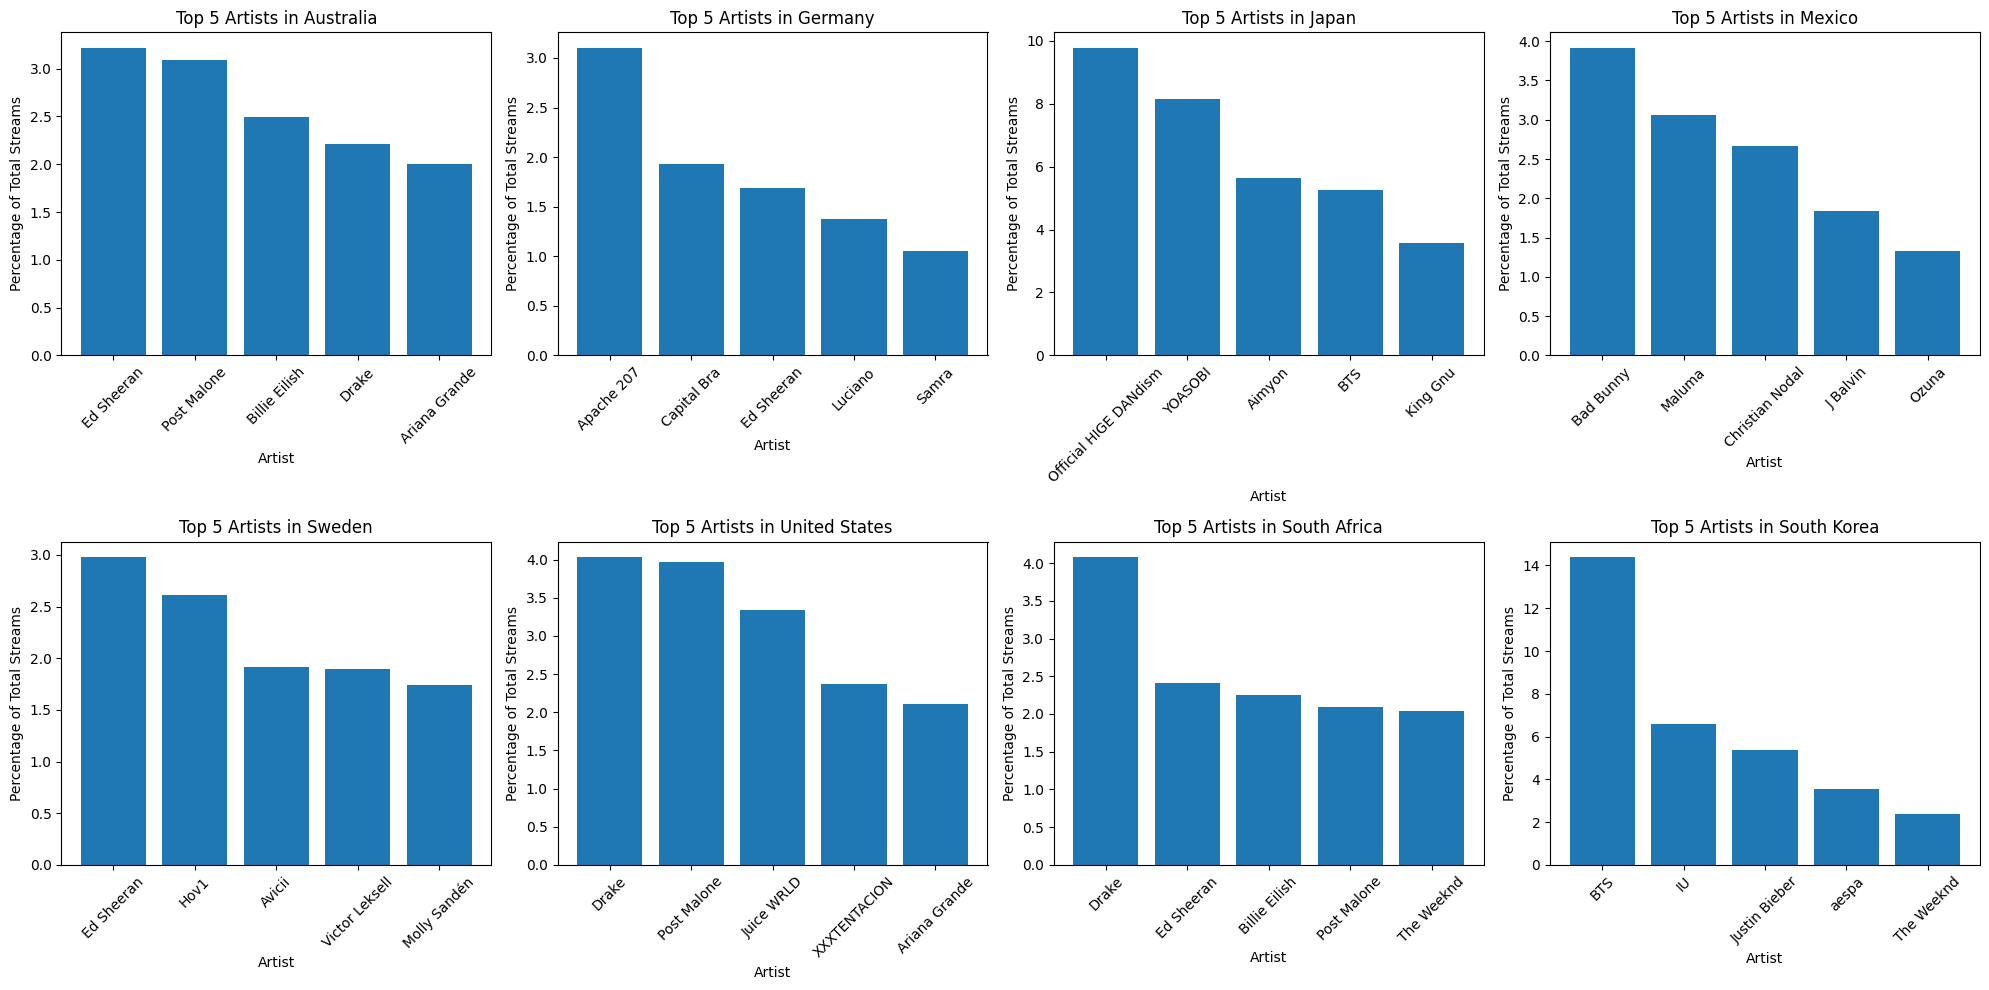

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame

# Berechnen der Gesamtstreams pro Künstler und Land
artist_streams = df.groupby(['artist', 'region'])['streams'].sum().reset_index()

# Berechnen der Gesamtstreams pro Land
total_streams_per_region = df.groupby('region')['streams'].sum()

# Berechnen der prozentualen Anteile
artist_streams['percentage'] = artist_streams.apply(
    lambda x: (x['streams'] / total_streams_per_region[x['region']]) * 100, axis=1
)

# Ermitteln der Top 5 Künstler pro Land
top_artists_per_region = artist_streams.groupby('region').apply(
    lambda x: x.nlargest(5, 'percentage')
).reset_index(drop=True)

# Einzigartige Regionen
unique_regions = df['region'].unique()

# Erstellen der Subplots (2x4 Raster)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # Umwandlung in ein 1D-Array für einfacheren Zugriff

for i, region in enumerate(unique_regions):
    region_df = top_artists_per_region[top_artists_per_region['region'] == region]
    axes[i].bar(region_df['artist'], region_df['percentage'])
    axes[i].set_title(f'Top 5 Artists in {region}')
    axes[i].set_xlabel('Artist')
    axes[i].set_ylabel('Percentage of Total Streams')
    axes[i].tick_params(axis='x', rotation=45)

# Anpassen des Layouts für bessere Darstellung
plt.tight_layout()
plt.show()


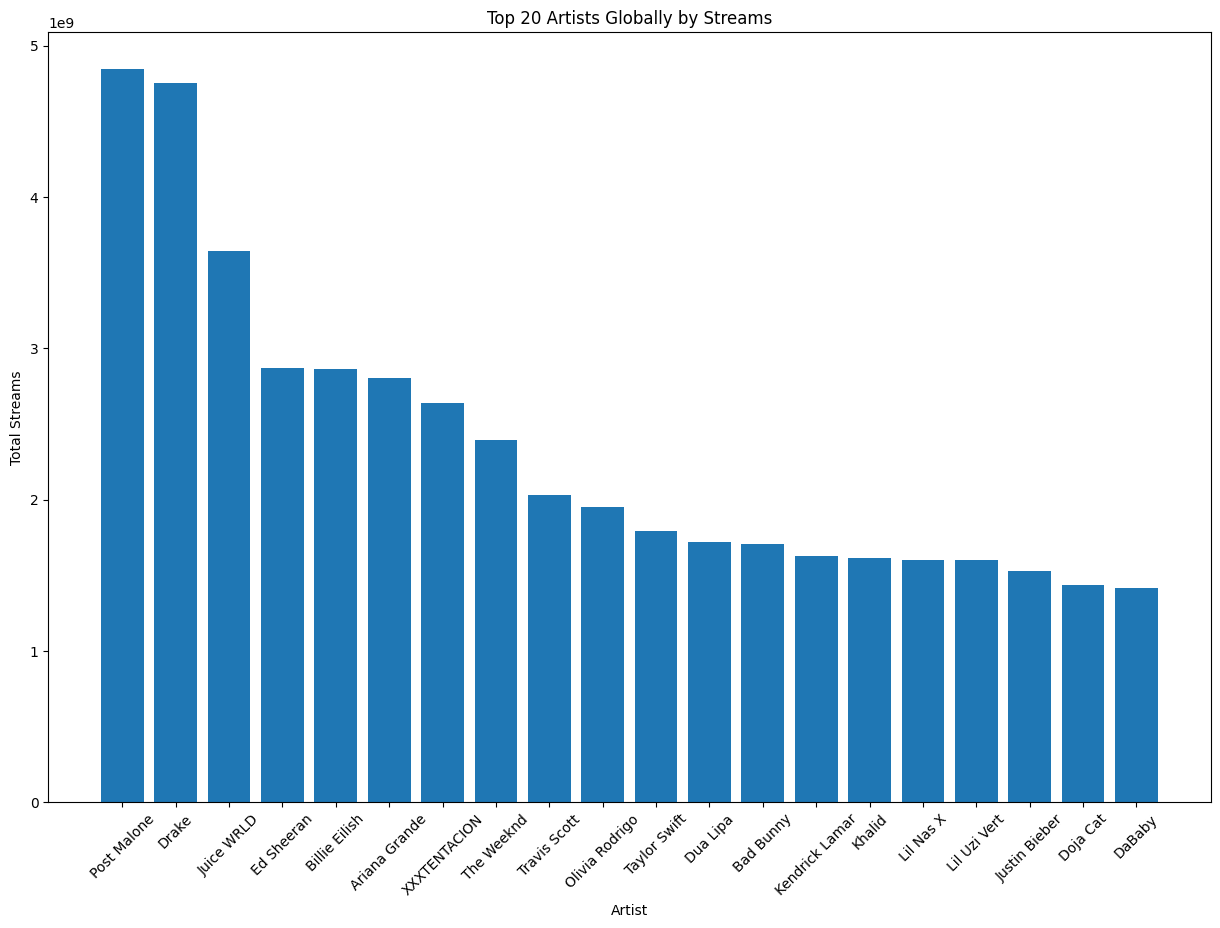

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame

# Schritt 1: Berechnen der Gesamtstreams pro Künstler
total_streams_per_artist = df.groupby('artist')['streams'].sum().reset_index()

# Schritt 2: Ermitteln der Top 20 Künstler weltweit
top_artists_global = total_streams_per_artist.nlargest(20, 'streams')

# Schritt 3: Plotten der Daten
plt.figure(figsize=(15, 10))
plt.bar(top_artists_global['artist'], top_artists_global['streams'])
plt.title('Top 20 Artists Globally by Streams')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.show()


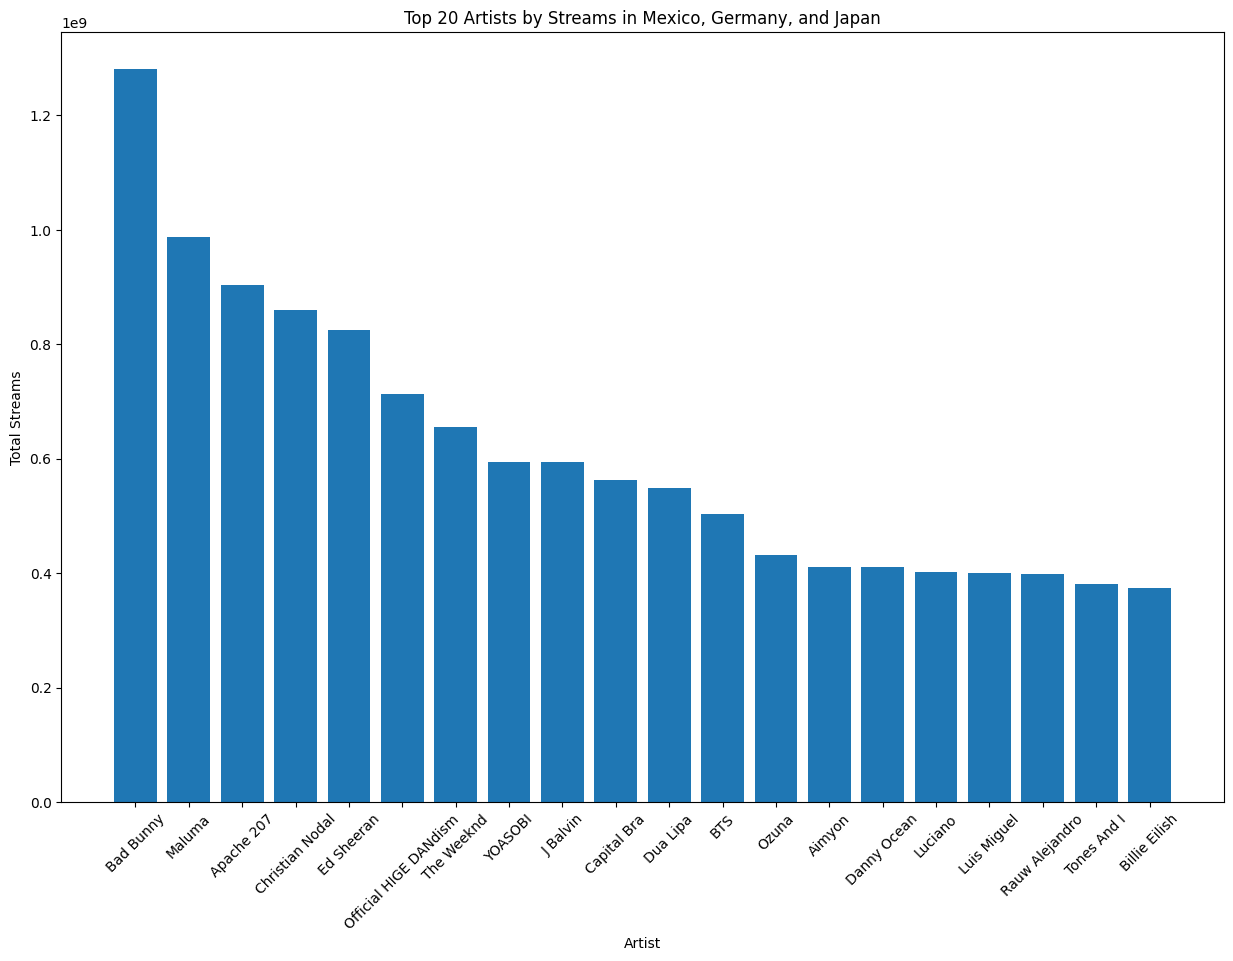

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame

# Schritt 1: Filtern der Daten für Mexiko, Deutschland und Japan
filtered_df = df[df['region'].isin(['Mexico', 'Germany', 'Japan'])]

# Schritt 2: Berechnen der Gesamtstreams pro Künstler in diesen Ländern
total_streams_per_artist = filtered_df.groupby('artist')['streams'].sum().reset_index()

# Schritt 3: Ermitteln der Top 20 Künstler in diesen Ländern
top_artists = total_streams_per_artist.nlargest(20, 'streams')

# Schritt 4: Plotten der Daten
plt.figure(figsize=(15, 10))
plt.bar(top_artists['artist'], top_artists['streams'])
plt.title('Top 20 Artists by Streams in Mexico, Germany, and Japan')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.show()


C:\Users\jkani\AppData\Local\Temp\ipykernel_22652\992415676.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['streams_per_capita'] = filtered_df.apply(


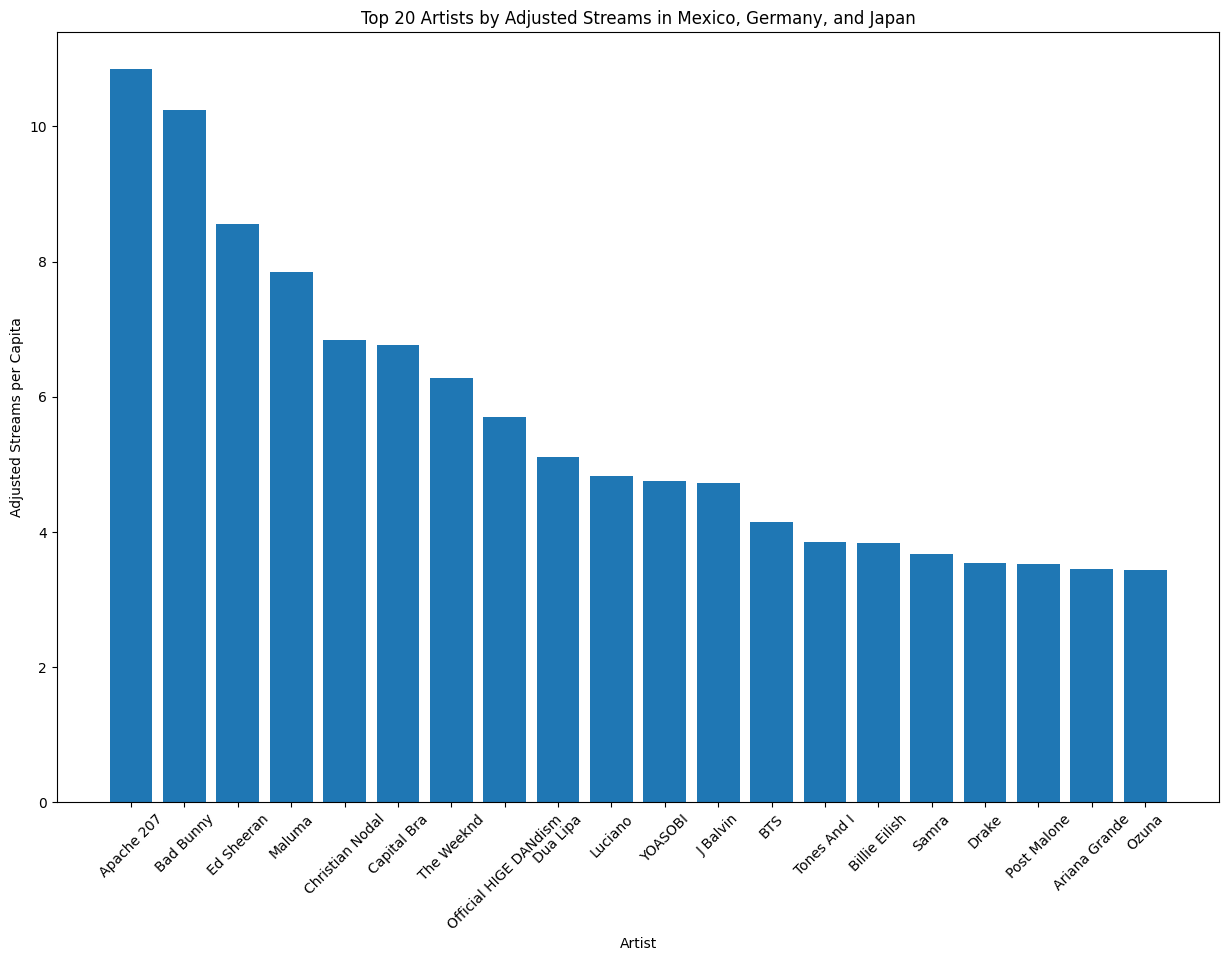

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame

# Einwohnerzahlen
population = {
    'Japan': 125000000,
    'Germany': 83200000,
    'Mexico': 126000000
}

# Schritt 1: Filtern der Daten für Mexiko, Deutschland und Japan
filtered_df = df[df['region'].isin(['Mexico', 'Germany', 'Japan'])]

# Schritt 2: Berechnen der Streams pro Kopf
filtered_df['streams_per_capita'] = filtered_df.apply(
    lambda x: x['streams'] / population[x['region']], axis=1
)

# Schritt 3: Aggregieren der Streams pro Kopf für jeden Künstler
total_streams_per_artist = filtered_df.groupby('artist')['streams_per_capita'].sum().reset_index()

# Schritt 4: Ermitteln der Top 20 Künstler basierend auf den angepassten Streams
top_artists = total_streams_per_artist.nlargest(20, 'streams_per_capita')

# Schritt 5: Plotten der Daten
plt.figure(figsize=(15, 10))
plt.bar(top_artists['artist'], top_artists['streams_per_capita'])
plt.title('Top 20 Artists by Adjusted Streams in Mexico, Germany, and Japan')
plt.xlabel('Artist')
plt.ylabel('Adjusted Streams per Capita')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()

NameError: name 'df' is not defined

C:\Users\jkani\AppData\Local\Temp\ipykernel_22652\3367511376.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['streams_per_capita'] = filtered_df.apply(


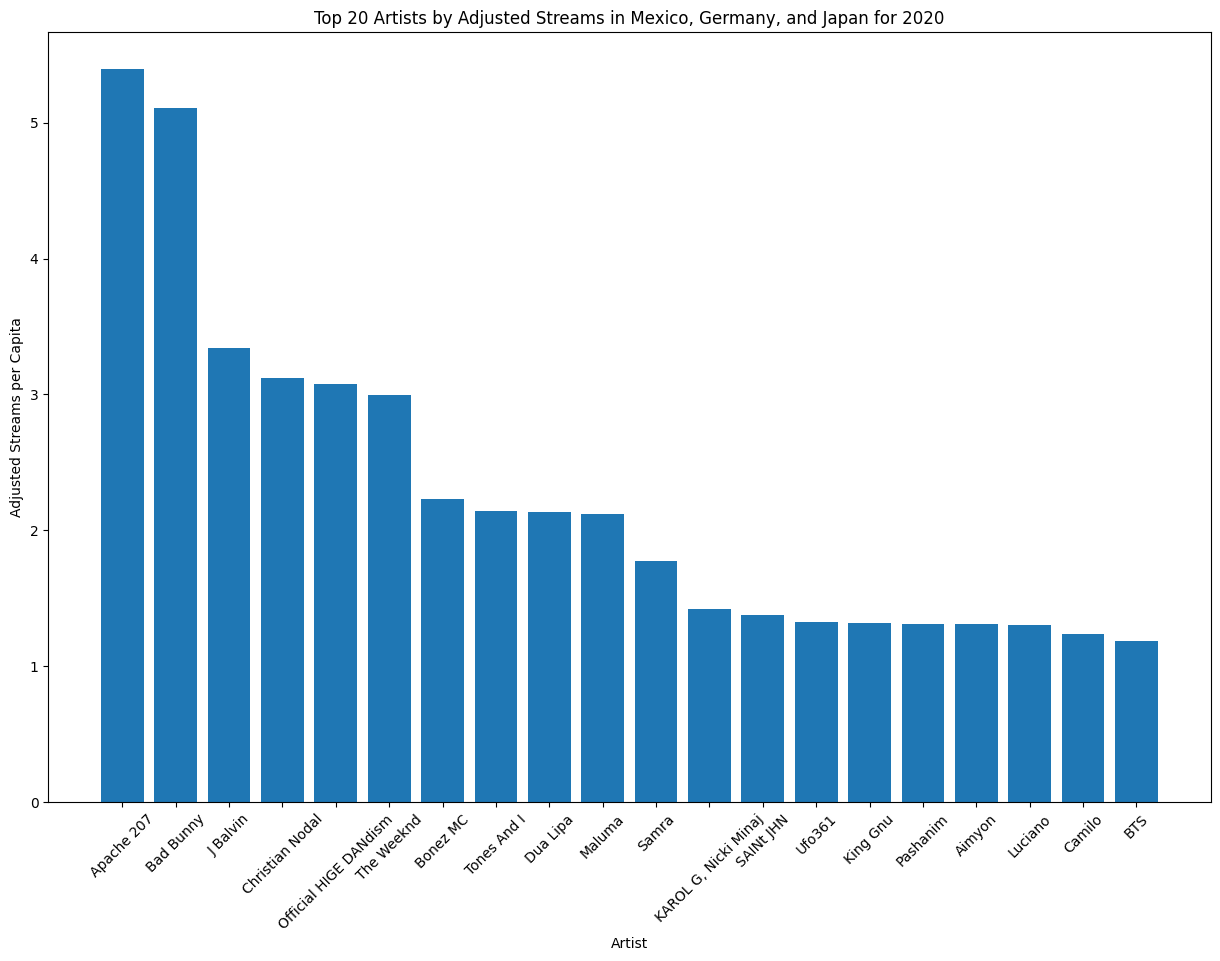

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame
# Jahr, das analysiert werden soll
year_to_analyze = 2020

# Einwohnerzahlen
population = {
    'Japan': 125000000,
    'Germany': 83200000,
    'Mexico': 126000000
}

# Schritt 1: Filtern der Daten für das gewählte Jahr und die Länder Mexiko, Deutschland und Japan
filtered_df = df[
    (df['region'].isin(['Mexico', 'Germany', 'Japan'])) &
    (pd.to_datetime(df['date']).dt.year == year_to_analyze)
]

# Schritt 2: Berechnen der Streams pro Kopf
filtered_df['streams_per_capita'] = filtered_df.apply(
    lambda x: x['streams'] / population[x['region']], axis=1
)

# Schritt 3: Aggregieren der Streams pro Kopf für jeden Künstler
total_streams_per_artist = filtered_df.groupby('artist')['streams_per_capita'].sum().reset_index()

# Schritt 4: Ermitteln der Top 20 Künstler basierend auf den angepassten Streams
top_artists = total_streams_per_artist.nlargest(20, 'streams_per_capita')

# Schritt 5: Plotten der Daten
plt.figure(figsize=(15, 10))
plt.bar(top_artists['artist'], top_artists['streams_per_capita'])
plt.title(f'Top 20 Artists by Adjusted Streams in Mexico, Germany, and Japan for {year_to_analyze}')
plt.xlabel('Artist')
plt.ylabel('Adjusted Streams per Capita')
plt.xticks(rotation=45)
plt.show()
